<a href="https://colab.research.google.com/github/krutika73/CLASSIFICATION-ON-CARDIOVASCULAR-RISK-PREDICTION/blob/main/KRUTIKA_CLASSIFICATION_Sample_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Cardiovascular Risk Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team member**     - Krutika Bhile

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Cardiovascular disease is a prevalent cause of morbidity and mortality worldwide. Identifying and managing individuals at high risk of developing cardiovascular disease at an early stage is crucial for preventing the disease. However, traditional risk prediction models, such as the Framingham Risk Score, have limitations in their accuracy and do not account for the complex interactions between different risk factors. To improve the accuracy of cardiovascular risk prediction, machine learning techniques have shown promise by integrating various risk factors and identifying non-linear interactions. Nevertheless, there is still a need to develop and validate machine learning models that accurately predict cardiovascular risk by utilizing demographic, clinical, and laboratory data. The objective of this project is to address this need by developing and evaluating a machine learning model for predicting the 10-year risk of cardiovascular disease using the Framingham Heart Study dataset.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries

# Import Libraries

## Data Maipulation Libraries
import numpy as np
import pandas as pd

## Data Visualisation Libraray
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import seaborn as sns 

## Machine Learning 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC

## Importing essential libraries to check the accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score

## Warnings 
import warnings 
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
# import drive
from google.colab import drive
drive.mount('/content/drive')

# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_cardiovascular_risk.csv')



Mounted at /content/drive


### Dataset First View

In [4]:
# Dataset First Look
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [5]:
df.tail()

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
# Dataset Rows & Columns count
print("Dataset Size")
print("Rows = {} and  Columns = {}".format(df.shape[0], df.shape[1]))
     


Dataset Size
Rows = 3390 and  Columns = 17


### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
# Missing Values/Null Values Count
print(df.isnull().sum())
     

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


<Axes: >

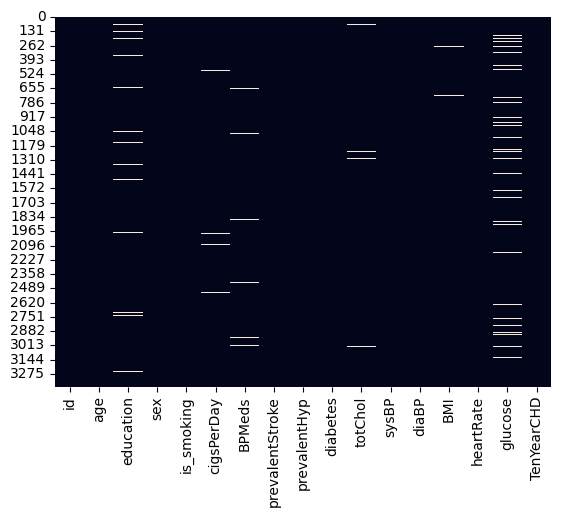

In [10]:
# Visualizing the missing values
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar = False)
     

### What did you know about your dataset?

Datasets used for predicting cardiovascular risk generally comprise information about various risk factors that could impact an individual's chances of developing cardiovascular disease. 

Such factors may consist of age, gender, blood pressure, cholesterol levels, smoking habits, past cardiovascular disease occurrences, and other factors like body mass index and diabetes.

It's important to note that these datasets may also contain incomplete information, particularly in the case of glucose and education variables. These variables have a higher likelihood of having missing values.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe(include='all')
     

id          age    education   sex is_smoking   cigsPerDay  \
count   3390.000000  3390.000000  3303.000000  3390       3390  3368.000000   
unique          NaN          NaN          NaN     2          2          NaN   
top             NaN          NaN          NaN     F         NO          NaN   
freq            NaN          NaN          NaN  1923       1703          NaN   
mean    1694.500000    49.542183     1.970936   NaN        NaN     9.069477   
std      978.753033     8.592878     1.019081   NaN        NaN    11.879078   
min        0.000000    32.000000     1.000000   NaN        NaN     0.000000   
25%      847.250000    42.000000     1.000000   NaN        NaN     0.000000   
50%     1694.500000    49.000000     2.000000   NaN        NaN     0.000000   
75%     2541.750000    56.000000     3.000000   NaN        NaN    20.000000   
max     3389.000000    70.000000     4.000000   NaN        NaN    70.000000   

             BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count   3346.000000      3390.000000   3390.000000  3390.000000  3352.000000   
unique          NaN              NaN           NaN          NaN          NaN   
top             NaN              NaN           NaN          NaN          NaN   
freq            NaN              NaN           NaN          NaN          NaN   
mean       0.029886         0.006490      0.315339     0.025664   237.074284   
std        0.170299         0.080309      0.464719     0.158153    45.247430   
min        0.000000         0.000000      0.000000     0.000000   107.000000   
25%        0.000000         0.000000      0.000000     0.000000   206.000000   
50%        0.000000         0.000000      0.000000     0.000000   234.000000   
75%        0.000000         0.000000      1.000000     0.000000   264.000000   
max        1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count   3390.00000  3390.000000  3376.000000  3389.000000  3086.000000   
unique         NaN          NaN          NaN          NaN          NaN   
top            NaN          NaN          NaN          NaN          NaN   
freq           NaN          NaN          NaN          NaN          NaN   
mean     132.60118    82.883038    25.794964    75.977279    82.086520   
std       22.29203    12.023581     4.115449    11.971868    24.244753   
min       83.50000    48.000000    15.960000    45.000000    40.000000   
25%      117.00000    74.500000    23.020000    68.000000    71.000000   
50%      128.50000    82.000000    25.380000    75.000000    78.000000   
75%      144.00000    90.000000    28.040000    83.000000    87.000000   
max      295.00000   142.500000    56.800000   143.000000   394.000000   

         TenYearCHD  
count   3390.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean       0.150737  
std        0.357846  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

### Variables Description 

**Demographic**:

1.Age: Age of the patient.

2.Sex: male or female("M" or "F")

**Behavioral**:

3.is_smoking: whether or not the patient is a current smoker ("YES" or "NO").

4.CigsPerDay: the number of cigarettes that the person smoked on average in one day.(countinous type feature because a person can smoke 'n' times a day)

**Medical**(history):

5.BPMeds: whether or not the patient was on blood pressure medication.

6.Prevalent Stroke: whether or not the patient had previously had a stroke.

7.Prevalent Hyp: whether or not the patient was hypertensive.

8.Diabetes: whether or not the patient had diabetes.

**Medical**(current):

9.Tot Chol: total cholesterol level.

10.Sys BP: systolic blood pressure.

11.Dia BP: diastolic blood pressure.

12.BMI: Body Mass Index.

13.Heart Rate: heart rate.

14.Glucose: glucose level.

**Target feature**(class of risk):

15.TenYearCHD: 10-year risk of coronary heart disease CHD (“1”, means “Yes”, “0” means “No”)

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ", i , "is" , df[i].nunique(), ".")
     

No. of unique values in  id is 3390 .
No. of unique values in  age is 39 .
No. of unique values in  education is 4 .
No. of unique values in  sex is 2 .
No. of unique values in  is_smoking is 2 .
No. of unique values in  cigsPerDay is 32 .
No. of unique values in  BPMeds is 2 .
No. of unique values in  prevalentStroke is 2 .
No. of unique values in  prevalentHyp is 2 .
No. of unique values in  diabetes is 2 .
No. of unique values in  totChol is 240 .
No. of unique values in  sysBP is 226 .
No. of unique values in  diaBP is 142 .
No. of unique values in  BMI is 1259 .
No. of unique values in  heartRate is 68 .
No. of unique values in  glucose is 132 .
No. of unique values in  TenYearCHD is 2 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.
# Separating the categorical and continous variable and storing them
categorical_variable=[]
continous_variable=[]

for i in df.columns:
  if i == 'id':
    pass
  elif df[i].nunique() <5:
    categorical_variable.append(i)
  elif df[i].nunique() >= 5:
    continous_variable.append(i)

print(categorical_variable)
print(continous_variable)
     

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In [15]:
# Summing null values
print('Missing Data Count')
df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False)

Missing Data Count


glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64

In [16]:
print('Missing Data Percentage')
print(round(df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False)/len(df)*100,2))

Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


<Axes: >

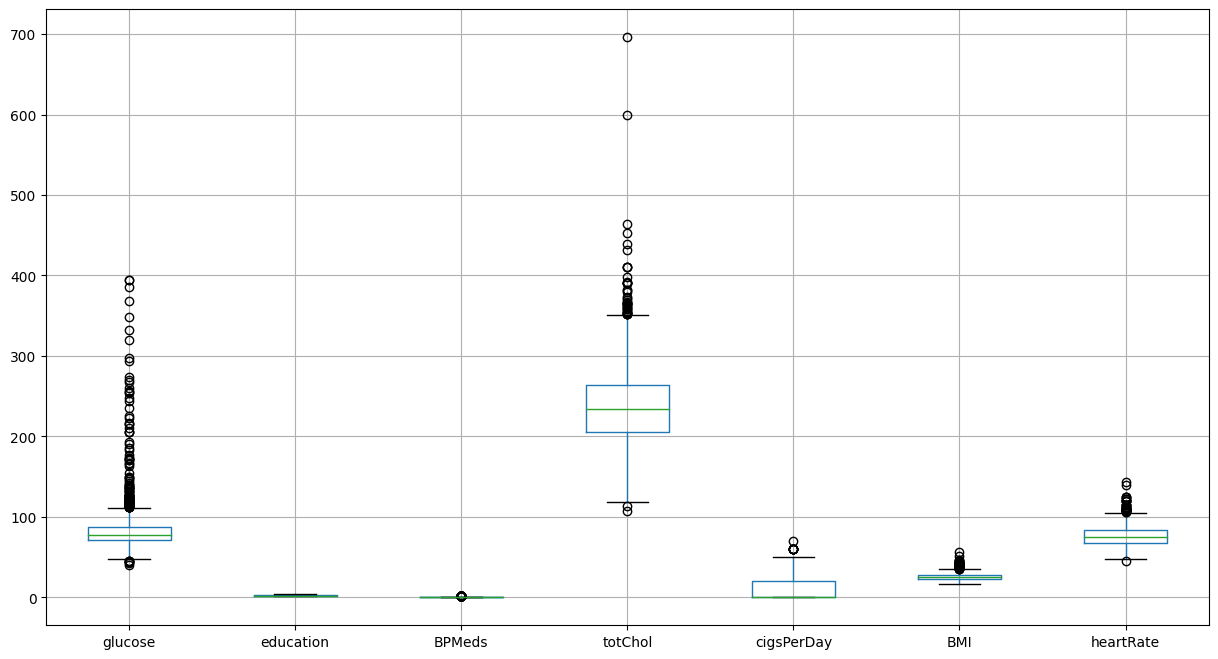

In [17]:
# storing the column that contains null values  
null_column_list= ['glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate']
# plotting box plot
plt.figure(figsize=(15,8))
df[null_column_list].boxplot()

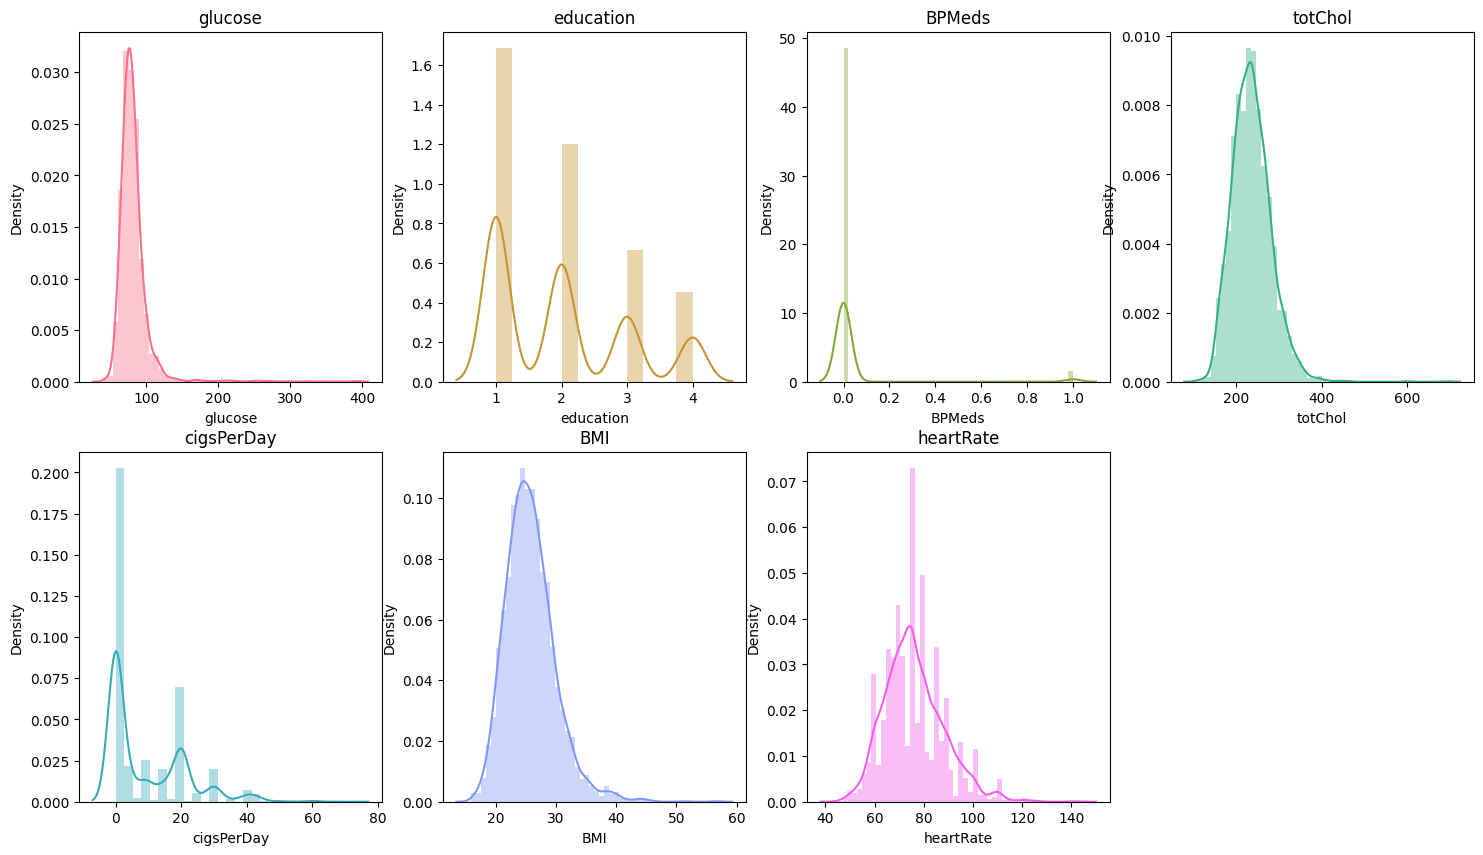

In [18]:
# Define a list of colors
colors = sns.color_palette("husl", len(null_column_list))

# Create a figure with 8 subplots (2 rows, 4 columns)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Iterate over the null column list and plot each column's distribution
for i, column in enumerate(null_column_list):
    # Select the current axis
    ax = axes[i]
    # Plot a distplot of the current column with a different color
    sns.distplot(df[column], ax=ax, color=colors[i])
    # Add a title to the plot
    ax.set_title(column)
    
# Remove any unused subplots
for j in range(len(null_column_list), len(axes)):
    axes[j].remove()

# Display the plots
plt.show()
     

The choice of a suitable measure of central tendency heavily relies on the characteristics of the data under consideration. Normally, when the data is continuous, and follows a normal distribution without any outliers, the mean is considered the most appropriate measure of central tendency. However, in cases where the data is numerical and contains extreme values or outliers, the median becomes the preferred choice. On the other hand, when dealing with categorical data, the mode is the preferred measure of central tendency.

After analyzing the distribution and outliers in the data, we have identified the most appropriate measures of central tendency for imputing the null values in the columns as follows:

"Education" , "BPMeds" -> mode: As "education" and "BPMeds" is a categorical variable, the mode is the most appropriate measure of central tendency. The mode represents the most frequently occurring value in the distribution and can provide insight into the most common level of education in the dataset.

"lGucose","TotChol", "cigsPerDay", "BMI", "HeartRate" -> median: Since this are numerical, continuous variable that contain extreme values or outliers, we have chosen the median as the appropriate measure of central tendency. The median is less sensitive to extreme values than the mean and provides a representative value for the central tendency of the distribution.

In [19]:
# Imputing missing values with median or mode
df.fillna({'glucose': df['glucose'].median(),
           'education': df['education'].mode()[0],
           'BPMeds': df['BPMeds'].mode()[0],
           'totChol': df['totChol'].median(),
           'cigsPerDay': df['cigsPerDay'].median(),
           'BMI': df['BMI'].median(),
           'heartRate': df['heartRate'].median()}, inplace=True)

In [20]:
# Verifying the results with a cross-check.
print(df.isnull().sum())

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


### What all manipulations have you done and insights you found?

We utilized a combination of median and mode imputation techniques to address the issue of missing values. Specifically, for columns such as glucose, totChol, cigsPerDay, BMI, and heartRate, the missing values were replaced with the median of the non-missing values. On the other hand, for columns such as education and BPMeds, the missing values were replaced with the mode, i.e., the most frequently occurring value, of the non-missing values. Median imputation is generally preferred for continuous variables due to its robustness to outliers when compared to mean imputation. On the other hand, mode imputation is commonly utilized for categorical variables or variables with discrete values that have a limited number of possible values.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Which age group is more susceptible to developing coronary heart disease?

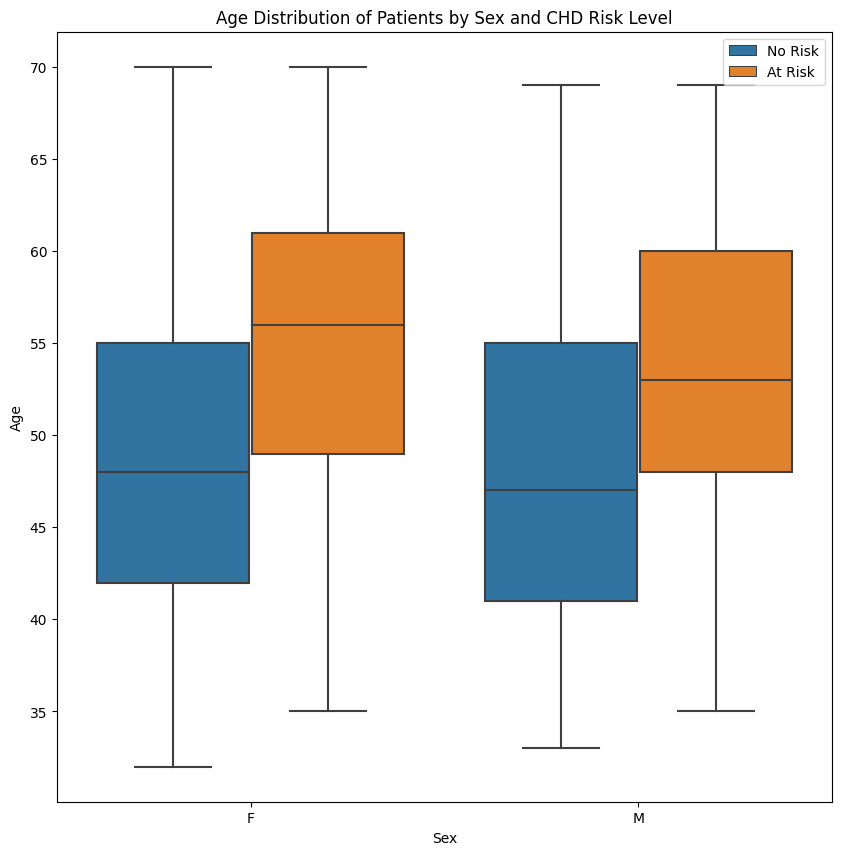

In [21]:
# Chart - 1 visualization code

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 10))
# Create a boxplot to compare the age distribution of patients by sex and CHD risk level
sns.boxplot(x="sex", y="age", hue="TenYearCHD", data= df, ax=ax)
# Set the title and labels
ax.set_title("Age Distribution of Patients by Sex and CHD Risk Level")
ax.set_xlabel("Sex")
ax.set_ylabel("Age")
# Adding a legend with appropriate labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["No Risk", "At Risk"], loc="best")
# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

The displayed boxplot provides a graphical representation of the distribution of ages among patients based on their sex and risk level for CHD (coronary heart disease). The boxplot is a useful tool to investigate the potential relationship between age, sex, and CHD risk level within the dataset. The authors likely selected this chart to explore patterns and trends among these variables more intuitively.

##### 2. What is/are the insight(s) found from the chart?

The data analysis reveals a prominent contrast in the age distribution of patients based on their CHD (coronary heart disease) risk level. Specifically, patients who are at risk for CHD tend to be older than those who are not at risk, regardless of sex. This observation underscores the importance of age as a potential risk factor for CHD development.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The information extracted from this chart could prove beneficial for healthcare-related businesses. For instance, companies that manufacture medical products or medications aimed at combating CHD could leverage these findings to target a specific patient group - those who are at higher risk or of advanced age. Nonetheless, it is worth noting that the chart's insights should not be the sole basis for making business decisions. Further investigation would be necessary to gain a comprehensive understanding of the interplay between age, sex, CHD risk level, and other pertinent factors. It's important to mention that there are no indications from this chart that suggest any negative growth.

#### Chart - 2 Does gender affect the risk of coronary heart disease in the dataset?



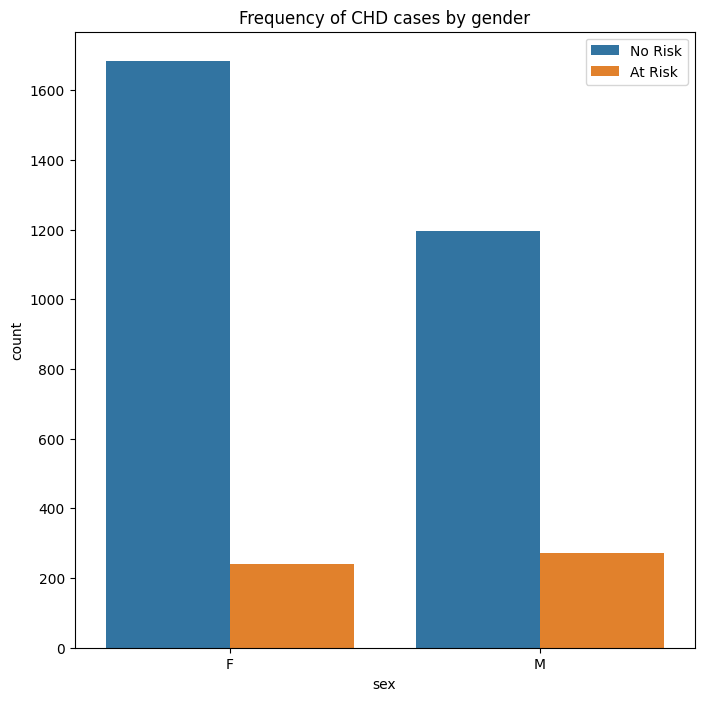

In [22]:
# Chart - 2 visualization code

plt.figure(figsize=(8,8))
sns.countplot(x='sex', hue='TenYearCHD', data= df)
plt.title('Frequency of CHD cases by gender')
plt.legend(['No Risk', 'At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

The countplot displayed provides a visual representation of the incidence of CHD (coronary heart disease) cases among males and females in the dataset. The authors probably selected this chart to determine whether gender is a potential factor that influences CHD risk levels in the data. By examining the frequency of CHD cases across genders, researchers could explore the relationship between gender and CHD risk levels.

##### 2. What is/are the insight(s) found from the chart?

The chart illustrates that CHD (coronary heart disease) cases are more prevalent among men than women in the dataset. Nevertheless, this difference is not significant, as the number of CHD cases is relatively comparable between genders. Additionally, the chart demonstrates that women have a higher count of no risk for CHD than men.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights obtained from this chart could potentially assist healthcare-related businesses in their decision-making process. For instance, firms that manufacture medical devices or medications for CHD might want to consider targeting both men and women, though they may want to pay more attention to men, who seem to be at a relatively higher risk of developing CHD in this dataset.

#### Chart - 3 Do smokers have a higher risk of developing coronary heart disease?

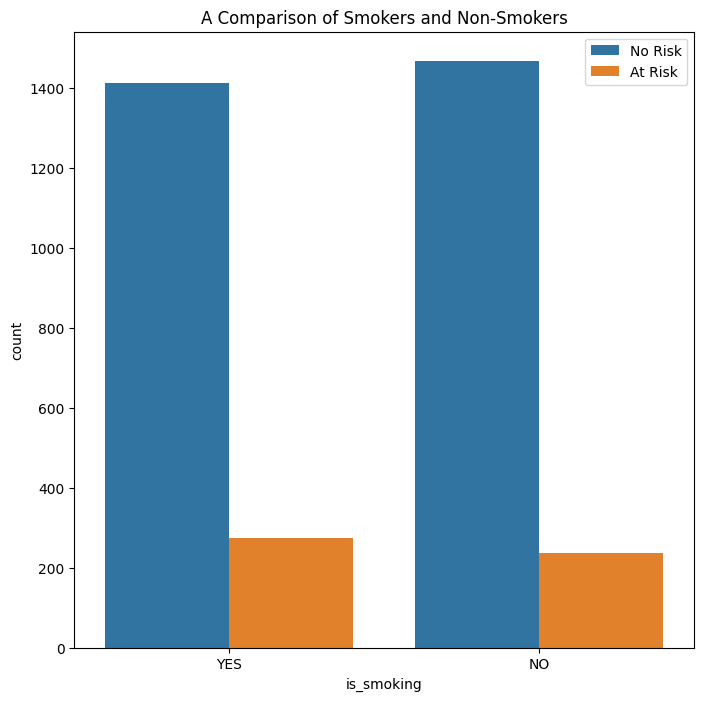

In [23]:
# Chart - 3 visualization code
plt.figure(figsize=(8,8))
sns.countplot(x='is_smoking', hue='TenYearCHD', data= df)
plt.title('A Comparison of Smokers and Non-Smokers')
plt.legend(['No Risk', 'At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

The countplot depicts the frequency of CHD (coronary heart disease) cases among smokers and non-smokers in the dataset. The authors probably selected this chart to understand the potential relationship between smoking and CHD risk levels in the data. By examining the incidence of CHD cases across smokers and non-smokers, researchers could explore the effect of smoking on CHD risk.

##### 2. What is/are the insight(s) found from the chart?

The chart indicates that patients who smoke are potentially more susceptible to CHD in this dataset. In particular, a larger proportion of patients who smoke are at risk of CHD when compared to non-smokers. The results imply that smoking may be a significant factor in determining CHD risk levels in this dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

While the chart provides insights into the relationship between smoking and the risk of CHD in this dataset, it does not provide any information on negative growth. Furthermore, this chart alone may not provide enough information for businesses to make decisions, as other factors such as age and lifestyle also play a role in determining the risk of CHD. It is important to note that the dataset used for this chart may not be fully representative of the general population, which could limit the applicability of the insights gained from this chart.

#### Chart - 4 How much smoking affect coronary heart disease?

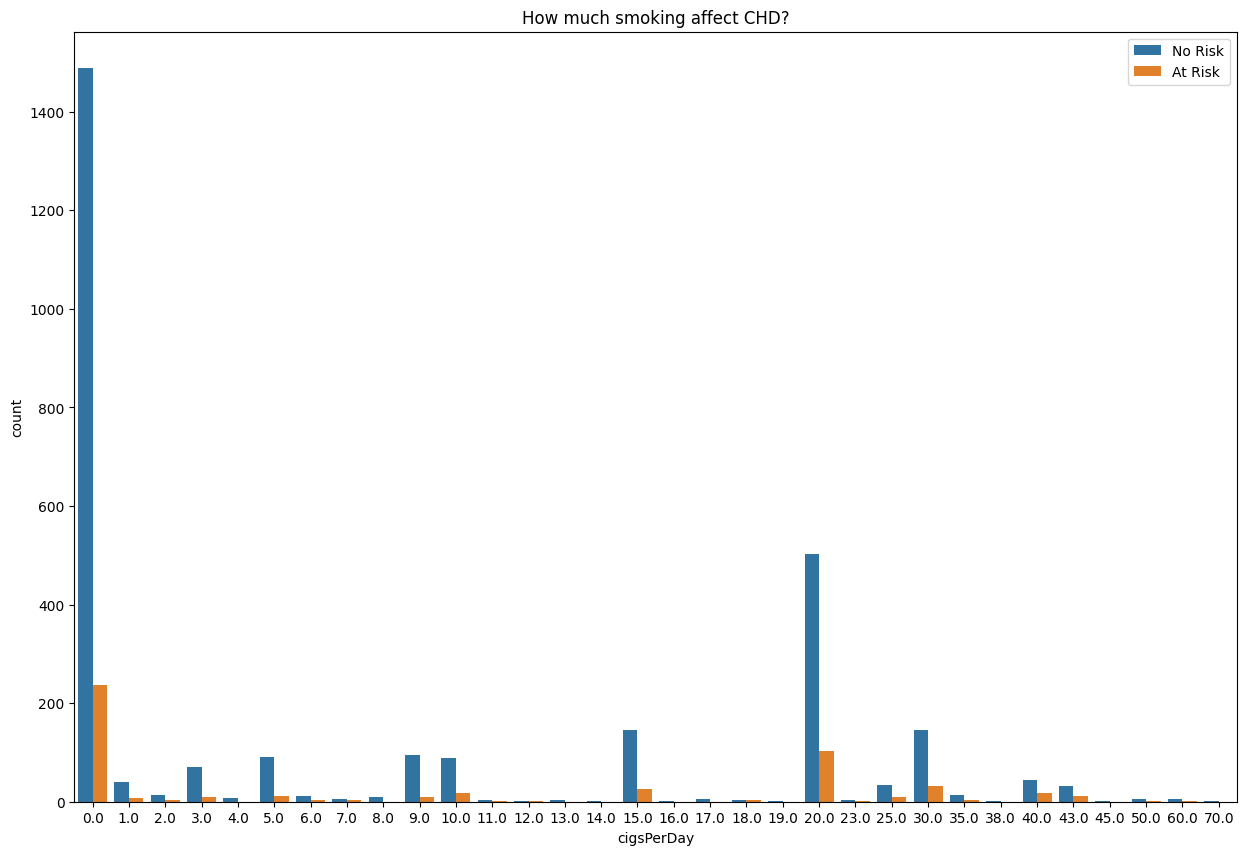

In [24]:
# Chart - 4 visualization code
plt.figure(figsize=(15,10))
sns.countplot(x= df['cigsPerDay'],hue= df['TenYearCHD'])
plt.title('How much smoking affect CHD?')
plt.legend(['No Risk','At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

The purpose of this chart is to examine the potential relationship between smoking intensity, measured by the number of cigarettes smoked per day, and the risk of CHD in this dataset. The countplot visualizes the frequency of CHD cases for each category of the number of cigarettes smoked per day. By examining the count of CHD cases in each category, it may be possible to identify any patterns or trends that suggest a relationship between smoking intensity and CHD risk in this dataset.

##### 2. What is/are the insight(s) found from the chart?

The chart illustrates that smoking intensity may be related to CHD risk in this dataset. Patients who smoke more cigarettes per day, or do not smoke, appear to be at higher risk for CHD than those who smoke fewer cigarettes per day. The proportion of patients at risk for CHD is higher among those who smoke 20 or more cigarettes per day than among those who smoke fewer cigarettes per day. These insights highlight the potential importance of smoking intensity in determining the risk of CHD and may be useful for businesses that provide healthcare services or products targeting smoking cessation or reducing smoking intensity. However, it's important to note that this chart alone may not provide enough information to make conclusive business decisions, and further analysis would be required to fully understand the relationship between smoking intensity and CHD risk.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Businesses that provide smoking cessation aids or medications for CHD may find it beneficial to target heavy smokers, as the chart suggests that they are at higher risk for CHD in this dataset.

#### Chart - 5 Do patients taking medication for blood pressure have a higher risk of developing coronary heart disease?

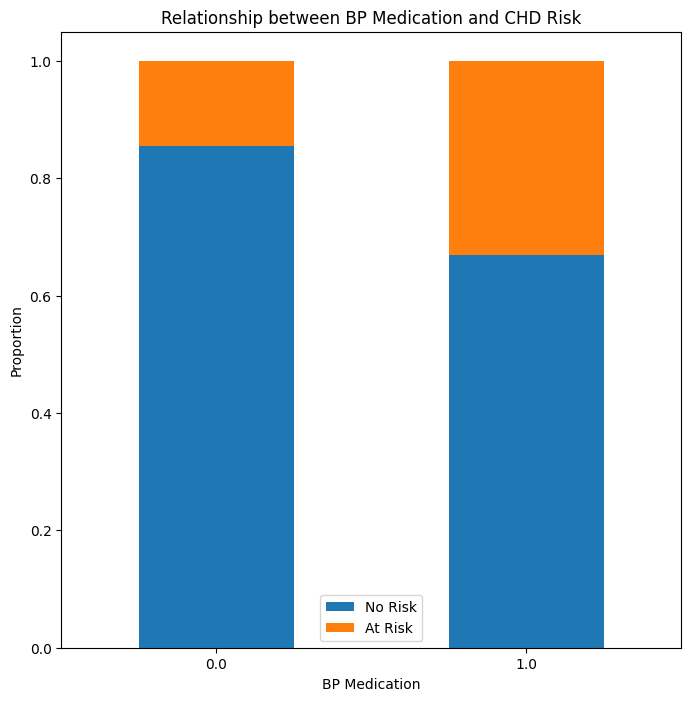

In [25]:
# Chart - 5 visualization code
# Compute the cross-tabulation of BP medication and CHD risk
ct = pd.crosstab(df['BPMeds'], df['TenYearCHD'], normalize='index')
# Plot a stacked bar chart
ct.plot(kind='bar', stacked=True, figsize=(8, 8))
plt.title('Relationship between BP Medication and CHD Risk')
plt.xlabel('BP Medication')
plt.xticks(rotation=0)
plt.ylabel('Proportion')
plt.legend(['No Risk', 'At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

The chart depicts a stacked bar chart that visualizes the distribution of CHD risk levels among patients who take medication for blood pressure and those who do not. The purpose of this chart may have been to explore the potential association between BP medication use and CHD risk in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that there is a difference in the CHD risk between patients who take medication for blood pressure and those who do not. Patients who take medication for blood pressure seem to have a higher risk of CHD compared to those who do not take such medication. The chart implies that BP medication use may play a critical role in determining CHD risk in this dataset.





##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

To reduce the risk of CHD, companies that produce BP medication or other treatments for hypertension may want to consider targeting patients who have high blood pressure, especially those who are at risk for CHD, whether or not they are currently taking medication for blood pressure. This strategy may help identify patients who would benefit from more intensive treatment to lower their risk of developing CHD.

#### Chart - 6 Is a person who has had a stroke more susceptible to coronary heart disease?

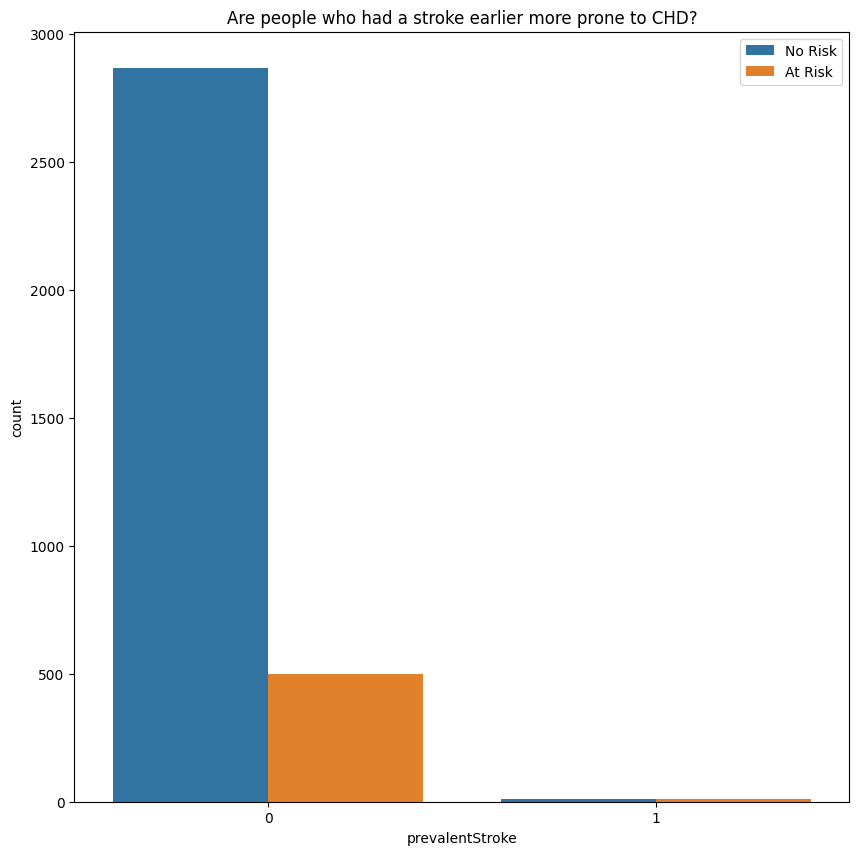

In [26]:
# Chart - 6 visualization code
plt.figure(figsize=(10,10))
sns.countplot(x=df['prevalentStroke'], hue=df['TenYearCHD'])
plt.title('Are people who had a stroke earlier more prone to CHD?')
plt.legend(['No Risk', 'At Risk'], loc='best')
plt.show()

##### 1. Why did you pick the specific chart?

The presented countplot compares the prevalence of CHD risk level in patients who have experienced a stroke versus those who have not, potentially aiming to explore a potential correlation between having a stroke and an increased vulnerability to CHD.

##### 2. What is/are the insight(s) found from the chart?

Based on the presented chart, it seems that individuals who have experienced a stroke have a greater likelihood of being susceptible to CHD than those who have not. More precisely, the countplot indicates that the percentage of patients at risk for CHD is higher in the group with a history of stroke when compared to the group without. Such results imply that having a stroke might be a contributing factor in the development of CHD in the analyzed dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The knowledge obtained from this countplot could be beneficial for healthcare-related businesses that offer products or services for stroke or CHD. For instance, companies that manufacture medications or treatments for either condition may consider directing their focus towards patients who have previously suffered a stroke, as they seem to have a higher risk of developing CHD. Healthcare providers may also find this information relevant, as they can use it to screen patients who have had a stroke for potential CHD risk and provide adequate preventative measures or treatments accordingly.

#### Chart - 7 Does having hypertension increase the risk of developing coronary heart disease?

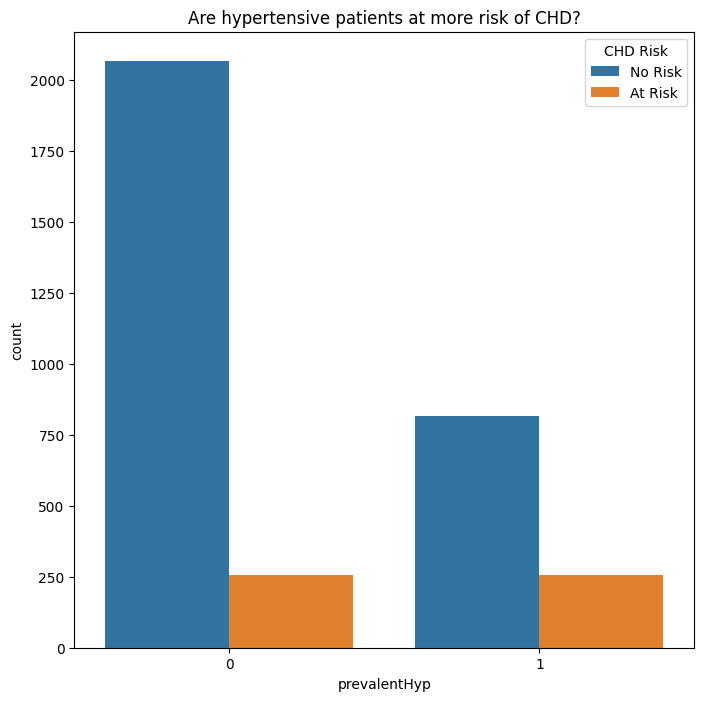

In [27]:
# Chart - 7 visualization code
plt.figure(figsize=(8,8))
sns.countplot(x=df['prevalentHyp'], hue=df['TenYearCHD'])
plt.title('Are hypertensive patients at more risk of CHD?')
plt.legend(title='CHD Risk', labels=['No Risk', 'At Risk'])
plt.show()
     

##### 1. Why did you pick the specific chart?

The purpose of selecting this chart was to illustrate the correlation between prevalent hypertension and the likelihood of developing coronary heart disease within the dataset.

##### 2. What is/are the insight(s) found from the chart?

The chart indicates that individuals who have pre-existing hypertension are at a higher risk of developing coronary heart disease compared to those who do not have hypertension. Specifically, the proportion of patients who are susceptible to CHD is comparable between individuals with prevalent hypertension and those without it.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The information gained from this chart can be useful for healthcare professionals and businesses in identifying patients with hypertension who are at a higher risk of developing or advancing coronary heart disease. This knowledge can aid in providing appropriate evaluation, monitoring, and management to prevent or slow down the progression of the disease. There is no evidence in this chart to suggest any negative growth.

#### Chart - 8 Do individuals with diabetes have a higher risk of developing coronary heart disease?

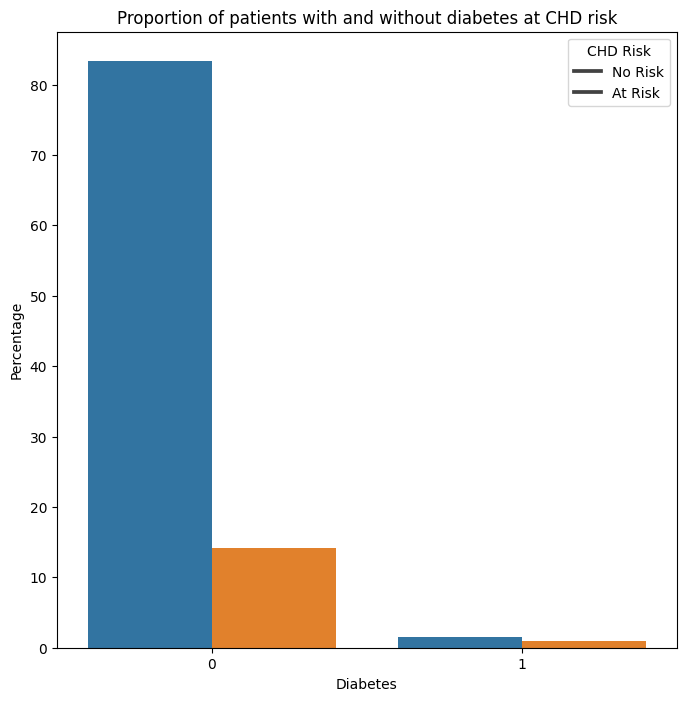

In [28]:
# Chart - 8 visualization code
plt.figure(figsize=(8,8))
sns.barplot(x=df['diabetes'], y=df['TenYearCHD'], hue=df['TenYearCHD'], estimator=lambda x: len(x) / len(df) * 100)
plt.title('Proportion of patients with and without diabetes at CHD risk')
plt.xlabel('Diabetes')
plt.ylabel('Percentage')
plt.legend(title='CHD Risk', labels=['No Risk', 'At Risk'])
plt.show()
     

##### 1. Why did you pick the specific chart?

This chart was selected to illustrate the ratio of patients in the dataset who have diabetes and those who do not, and who are susceptible to developing coronary heart disease.

##### 2. What is/are the insight(s) found from the chart?

According to the chart, individuals who have diabetes are at a higher risk of developing coronary heart disease in comparison to those who do not have diabetes.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gleaned from this chart can assist healthcare professionals and businesses in identifying patients with diabetes who are at a heightened risk of developing or exacerbating coronary heart disease. This knowledge can aid in providing appropriate evaluation, monitoring, and management to prevent or slow down the progression of the disease.

#### Chart - 9 Is there a correlation between total cholesterol levels and coronary heart disease?

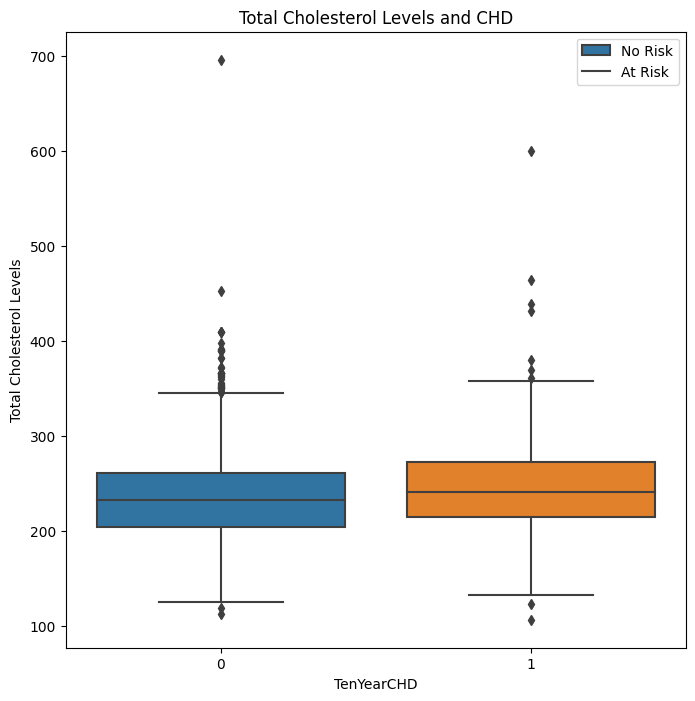

In [29]:
# Chart - 9 visualization code
plt.figure(figsize=(8,8))
sns.boxplot(x='TenYearCHD', y='totChol', data=df)
plt.title('Total Cholesterol Levels and CHD')
plt.xlabel('TenYearCHD')
plt.ylabel('Total Cholesterol Levels')
plt.legend(['No Risk', 'At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

The particular box plot was selected to address the query of whether there exists a correlation between an individual's total cholesterol levels and their likelihood of developing coronary heart disease.

##### 2. What is/are the insight(s) found from the chart?

As per the box plot, on average, patients who are susceptible to developing coronary heart disease have marginally higher total cholesterol levels than those who are not at risk. However, there is a degree of overlap in the cholesterol level range between the two groups.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The knowledge acquired from this box plot can aid healthcare providers in acknowledging the influence of total cholesterol levels on their patients' risk of developing coronary heart disease. Identifying patients with elevated cholesterol levels can enable healthcare providers to initiate appropriate interventions to mitigate their risk of developing the disease. This can have a positive impact on the patients' health outcomes and result in long-term cost savings for healthcare providers.

#### Chart - 10 What is the pairwise relationship between glucose levels, systolic blood pressure, diastolic blood pressure, and the risk of developing coronary heart disease?

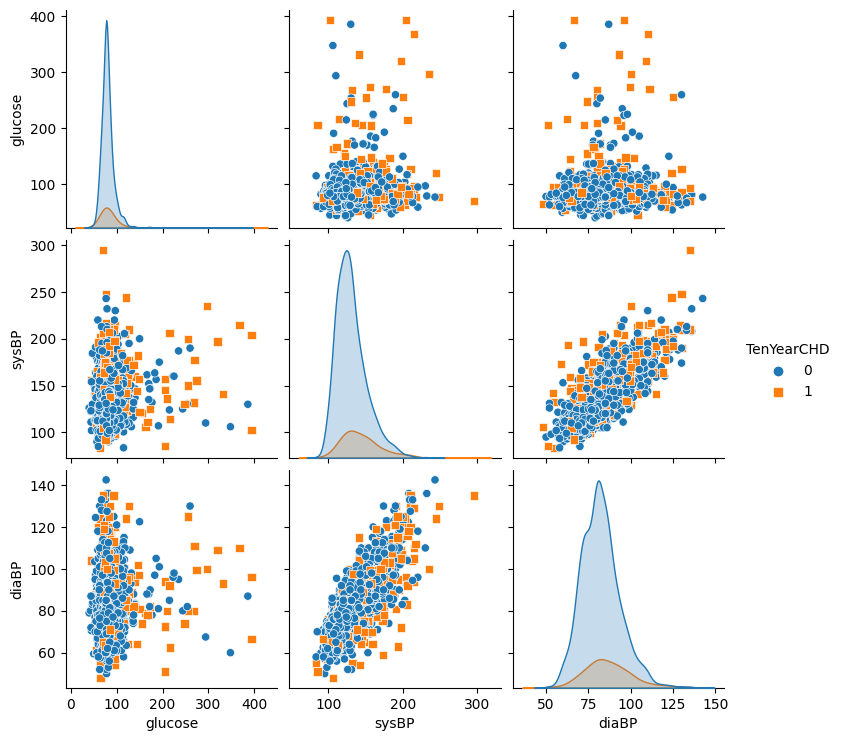

In [30]:
# Chart - 10 visualization code
# select the columns of interest
cols = ['glucose', 'sysBP', 'diaBP', 'TenYearCHD']

# create the scatter plot matrix
sns.pairplot(df[cols], hue='TenYearCHD', markers=['o', 's'])

The concentration of orange points in the upper right quadrant of the glucose vs. TenYearCHD plot suggests a correlation between high glucose levels and an increased risk of developing coronary heart disease. Similarly, the greater concentration of orange points in the upper right quadrants of the sysBP vs. TenYearCHD and diaBP vs. TenYearCHD plots indicates that higher blood pressure levels (both systolic and diastolic) are also associated with an increased risk of developing the disease.

The patterns of orange points in the glucose vs. sysBP and glucose vs. diaBP plots suggest the possibility of interaction effects between glucose and blood pressure on the risk of developing coronary heart disease. However, further analysis is required to explore these relationships in greater detail. The gained insight can help healthcare providers in identifying patients who may be at a higher risk of developing the disease and implementing appropriate interventions to lower their risk factors.

##### 1. Why did you pick the specific chart?

The motive behind selecting this chart was to illustrate the interrelationships between four variables: glucose levels, systolic blood pressure, diastolic blood pressure, and the risk of developing coronary heart disease. The pairplot was employed to present all the pairwise scatterplots, with histograms along the diagonal.

##### 2. What is/are the insight(s) found from the chart?

The pairplot depicts the pairwise correlations between glucose levels, systolic blood pressure, diastolic blood pressure, and the risk of developing coronary heart disease. The histograms along the diagonal demonstrate the distribution of each variable, while the scatter plots exhibit the correlation between each variable pair. The findings reveal that individuals with higher glucose levels tend to have a greater likelihood of developing coronary heart disease. Furthermore, individuals with higher systolic and diastolic blood pressure are also more susceptible to the disease.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights derived from this chart do not result in negative growth; on the contrary, they have the potential to promote positive growth. By assisting healthcare businesses in devising more efficient prevention and treatment plans, the findings can enhance patient outcomes and potentially lower healthcare expenditures.

#### Chart - 11 Does cigarette smoking have a differential impact on the risk of developing coronary heart disease between males and females?

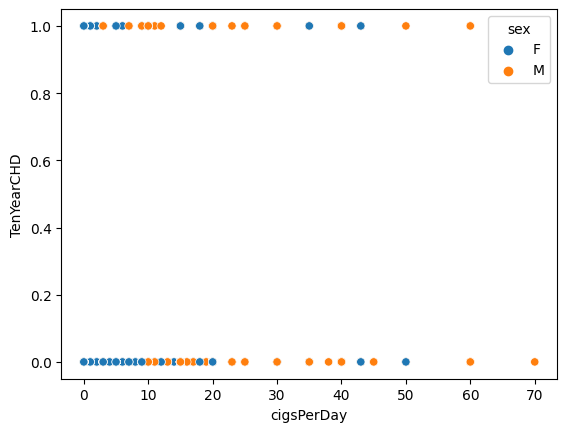

In [31]:
# Chart - 11 visualization code
# select the columns of interest
cols = ['sex', 'cigsPerDay', 'TenYearCHD']

# create a grouped scatter plot of TenYearCHD by cigsPerDay and sex
sns.scatterplot(x='cigsPerDay', y='TenYearCHD', hue='sex', data=df)

# show the plot
plt.show()

##### 1. Why did you pick the specific chart?

This chart was selected to portray the correlation between the number of cigarettes smoked per day, the likelihood of developing coronary heart disease, and how gender influences this relationship. A scatter plot was utilized to display the distribution of data points and recognize any trends or patterns in the data.

##### 2. What is/are the insight(s) found from the chart?

The chart demonstrates that an increase in the number of cigarettes smoked per day raises the risk of developing coronary heart disease in both male and female smokers. Nevertheless, the correlation between smoking and CHD risk is more pronounced in males than females. Males who smoke more than ten cigarettes per day have a considerably higher likelihood of developing CHD compared to females who smoke the same amount.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By analyzing the relationship between the number of cigarettes smoked per day, gender, and the risk of developing CHD, this chart can provide valuable insights for public health organizations and businesses. These insights can help create targeted interventions to reduce smoking rates and prevent the development of CHD, particularly among male smokers who are at a higher risk. For instance, public health campaigns can be tailored to raise awareness of the health risks associated with smoking and to provide resources and support for smokers who want to quit. Furthermore, businesses can implement smoking cessation programs for their employees to improve their health and well-being, which can lead to a positive impact on employee productivity and reduce healthcare costs.

#### Chart - 12 Are there differences in the age and sex distributions between individuals with and without prevalent stroke?

<Axes: xlabel='prevalentStroke', ylabel='age'>

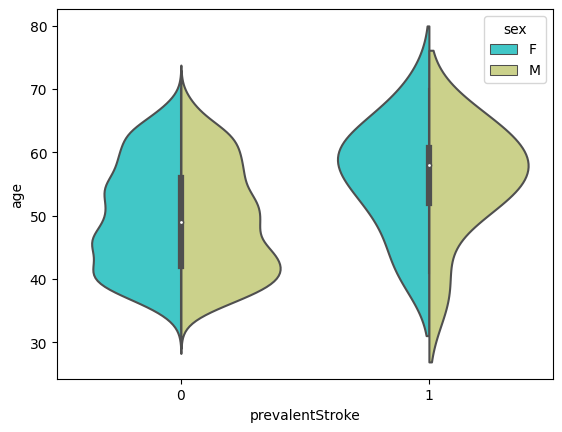

In [32]:
# Chart - 12 visualization code
sns.violinplot(x='prevalentStroke',y="age",data=df, hue='sex', split='True', palette='rainbow')

it is made clear that most of the prevalent strokes were shown by patients abbove age 45 and most of those patients are females.

##### 1. Why did you pick the specific chart?

I selected a violin plot as it can clearly display the distribution of age for two distinct groups (individuals with and without a prevalent stroke), and enables comparison of the sex distribution within each group.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that individuals with a prevalent stroke tend to be older than those without a stroke. Additionally, the chart shows that there are more males than females in both groups, but the proportion of males is higher in the group with prevalent stroke.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this chart have significant implications for healthcare organizations and insurance companies in terms of stroke prevention and treatment policies. For instance, healthcare organizations can use this information to identify at-risk individuals and provide them with appropriate preventive interventions, such as blood thinners, to reduce their risk of having a stroke. The insights can also inform the design of stroke rehabilitation programs by taking into account the age and sex distribution of individuals who have had a stroke. Insurance companies can use this information to develop policies related to stroke coverage and premiums, taking into account the age and sex of their policyholders.

#### Chart - 13 Is there any relation between individual with hypertensive and cigsperday?

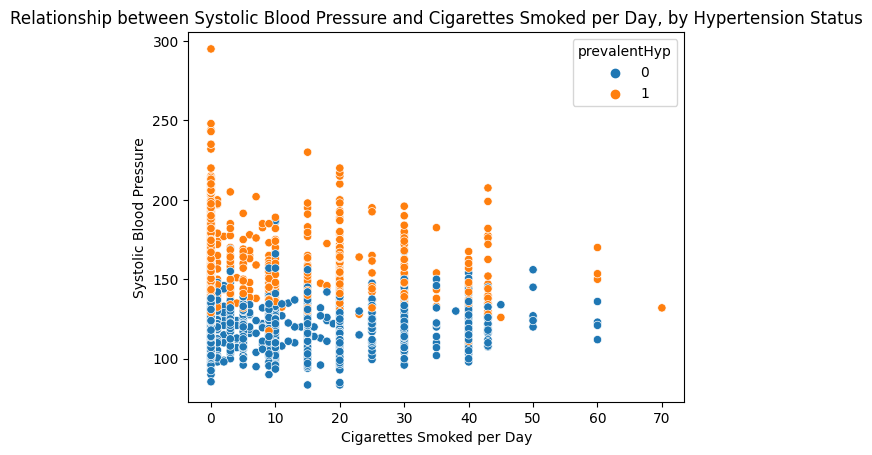

In [33]:
# Chart - 13 visualization code
# create a scatter plot of sysBP against cigsPerDay, colored by hypertension status
sns.scatterplot(x='cigsPerDay', y='sysBP', hue='prevalentHyp', data=df)

# add a title and axis labels
plt.title('Relationship between Systolic Blood Pressure and Cigarettes Smoked per Day, by Hypertension Status')
plt.xlabel('Cigarettes Smoked per Day')
plt.ylabel('Systolic Blood Pressure')

# display the plot
plt.show()

##### 1. Why did you pick the specific chart?

I selected a scatterplot because it is an effective way to display the relationship between two continuous variables: cigsPerDay and sysBP. By using color to differentiate between individuals with and without hypertension, we can quickly identify any patterns or trends in the data based on their hypertensive status.

##### 2. What is/are the insight(s) found from the chart?

The scatterplot indicates a positive correlation between cigsPerDay and sysBP, regardless of hypertension status. This means that as the number of cigarettes smoked per day increases, the systolic blood pressure levels also tend to increase. Furthermore, the plot shows that individuals with prevalent hypertension have higher systolic blood pressure levels than those without hypertension, indicating that hypertension is a significant contributor to higher blood pressure levels.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The information gained from this chart has potential applications in healthcare and wellness settings, where monitoring blood pressure levels and reducing cardiovascular risk factors such as smoking are crucial. By identifying the positive relationship between smoking and systolic blood pressure, healthcare providers can encourage smoking cessation as a means of reducing blood pressure levels and decreasing the risk of developing hypertension and related cardiovascular diseases.

While there are no negative growth implications from this chart, the implementation and success of smoking cessation programs could potentially have a negative impact on tobacco companies and the tobacco industry.

#### Chart - 14 - Correlation Heatmap

In [34]:
# Correlation Heatmap visualization code
df.corr()

id       age  education  cigsPerDay    BPMeds  \
id               1.000000  0.016759  -0.027337   -0.018097  0.007014   
age              0.016759  1.000000  -0.170614   -0.191465  0.122114   
education       -0.027337 -0.170614   1.000000    0.014078 -0.019880   
cigsPerDay      -0.018097 -0.191465   0.014078    1.000000 -0.035727   
BPMeds           0.007014  0.122114  -0.019880   -0.035727  1.000000   
prevalentStroke -0.038873  0.059038  -0.031820   -0.041576  0.116183   
prevalentHyp     0.013236  0.308826  -0.081925   -0.078003  0.256892   
diabetes         0.003690  0.107875  -0.051895   -0.048114  0.070932   
totChol         -0.019792  0.271961  -0.021221   -0.025346  0.080918   
sysBP            0.019676  0.404845  -0.132202   -0.100348  0.260384   
diaBP            0.000832  0.221896  -0.060774   -0.068320  0.198780   
BMI              0.039739  0.137478  -0.135783   -0.099830  0.087648   
heartRate        0.024691 -0.002636  -0.039395    0.066229  0.018107   
glucose          0.014187  0.112395  -0.039303   -0.066374  0.061356   
TenYearCHD       0.009866  0.224927  -0.051388    0.068020  0.087349   

                 prevalentStroke  prevalentHyp  diabetes   totChol     sysBP  \
id                     -0.038873      0.013236  0.003690 -0.019792  0.019676   
age                     0.059038      0.308826  0.107875  0.271961  0.404845   
education              -0.031820     -0.081925 -0.051895 -0.021221 -0.132202   
cigsPerDay             -0.041576     -0.078003 -0.048114 -0.025346 -0.100348   
BPMeds                  0.116183      0.256892  0.070932  0.080918  0.260384   
prevalentStroke         1.000000      0.071652  0.010115 -0.010769  0.057568   
prevalentHyp            0.071652      1.000000  0.082565  0.158693  0.699285   
diabetes                0.010115      0.082565  1.000000  0.059194  0.124011   
totChol                -0.010769      0.158693  0.059194  1.000000  0.197848   
sysBP                   0.057568      0.699285  0.124011  0.197848  1.000000   
diaBP                   0.047235      0.612897  0.061165  0.153825  0.781908   
BMI                     0.017032      0.299615  0.087793  0.113452  0.331730   
heartRate              -0.019183      0.150731  0.039746  0.086955  0.178135   
glucose                 0.023662      0.082962  0.609743  0.060913  0.137832   
TenYearCHD              0.068627      0.166544  0.103681  0.093605  0.212703   

                    diaBP       BMI  heartRate   glucose  TenYearCHD  
id               0.000832  0.039739   0.024691  0.014187    0.009866  
age              0.221896  0.137478  -0.002636  0.112395    0.224927  
education       -0.060774 -0.135783  -0.039395 -0.039303   -0.051388  
cigsPerDay      -0.068320 -0.099830   0.066229 -0.066374    0.068020  
BPMeds           0.198780  0.087648   0.018107  0.061356    0.087349  
prevalentStroke  0.047235  0.017032  -0.019183  0.023662    0.068627  
prevalentHyp     0.612897  0.299615   0.150731  0.082962    0.166544  
diabetes         0.061165  0.087793   0.039746  0.609743    0.103681  
totChol          0.153825  0.113452   0.086955  0.060913    0.093605  
sysBP            0.781908  0.331730   0.178135  0.137832    0.212703  
diaBP            1.000000  0.379684   0.174908  0.069097    0.135979  
BMI              0.379684  1.000000   0.069491  0.088502    0.066134  
heartRate        0.174908  0.069491   1.000000  0.081516    0.020167  
glucose          0.069097  0.088502   0.081516  1.000000    0.133472  
TenYearCHD       0.135979  0.066134   0.020167  0.133472    1.000000

<Axes: >

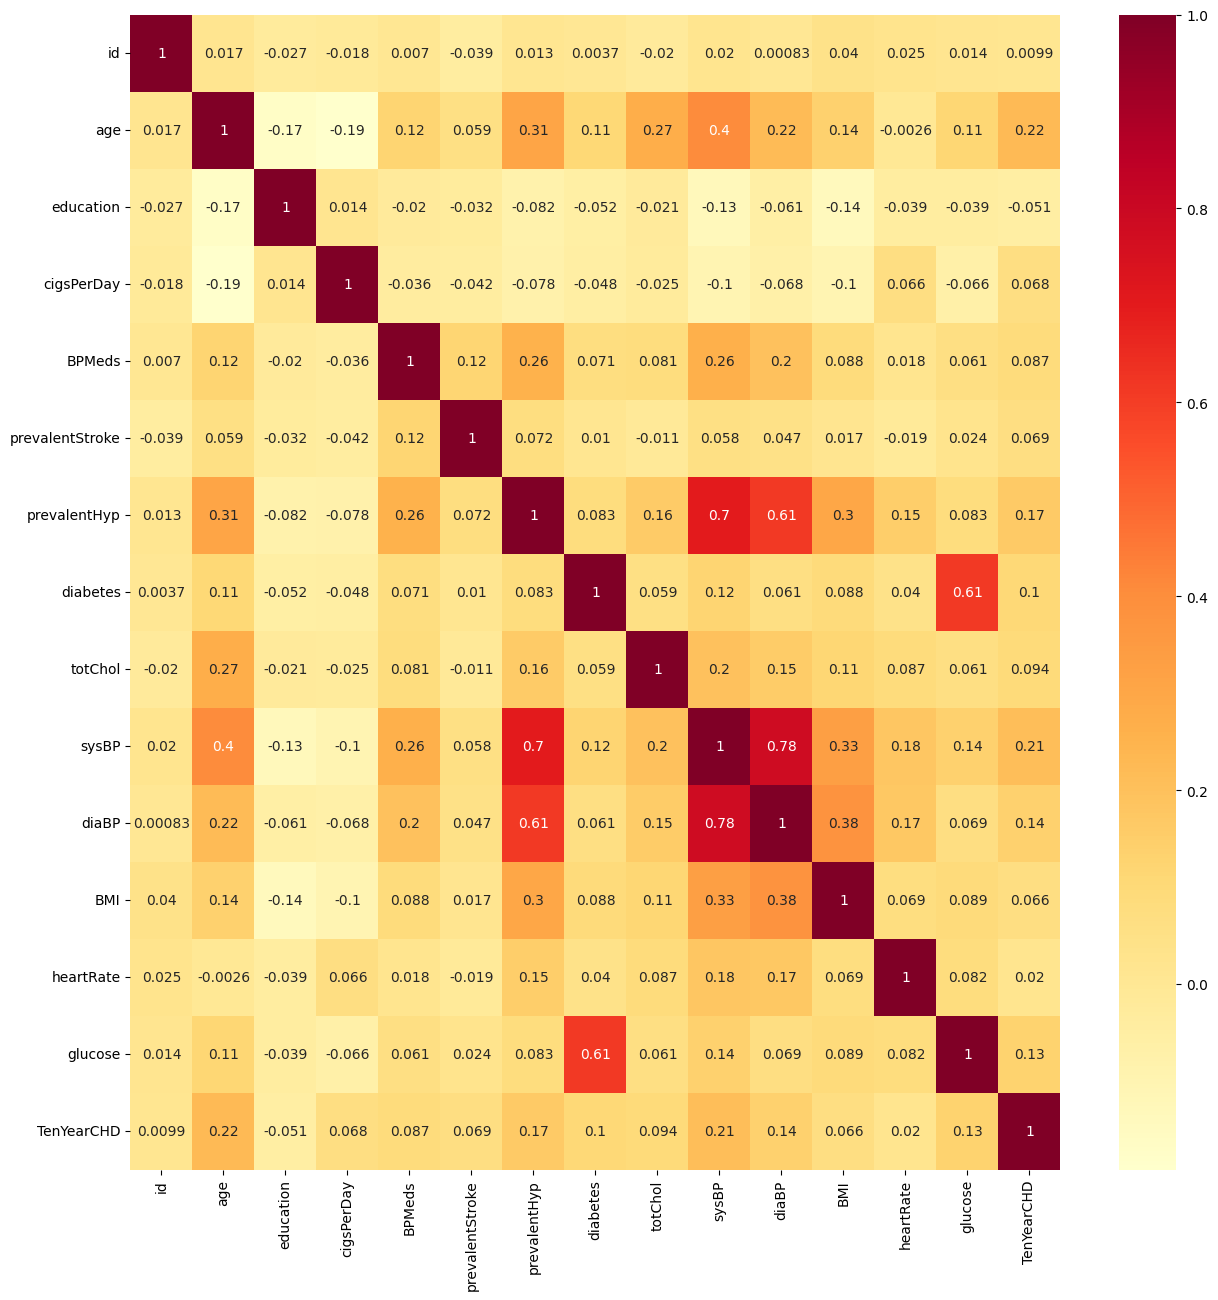

In [35]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,15))
correlation = df.corr()
sns.heatmap((correlation), annot=True, cmap=sns.color_palette("YlOrRd", as_cmap=True))
     

##### 1. Why did you pick the specific chart?

I chose to use the Correlation Heatmap because it allows for a comprehensive visualization of the correlations between all pairs of features in a dataset. The use of colors to represent the magnitude of the correlation coefficient makes it easy to quickly identify highly correlated features and patterns within the data.

##### 2. What is/are the insight(s) found from the chart?

The Correlation Heatmap shows the pairwise correlation between all numerical features in the dataset.

1.The correlation chart highlights that there is a significant positive correlation of 22% between age and TenYearCHD, which suggests that age may be an important predictor of CHD risk.

2.Based on the heatmap, it appears that age, systolic blood pressure, and diastolic blood pressure are strongly correlated with the TenYearCHD target variable.

3.Moreover, the heatmap shows a moderate positive correlation of 78% between systolic and diastolic blood pressure.

4.In addition, diabetes and glucose appear to be positively correlated by 61%.

5.Furthermore, prevalent hypertension is highly correlated with systolic and diastolic blood pressure, by 70% and 61% respectively.

6.Lastly, the chart also indicates a negative correlation of 17% and 19% between age and education, and age and cigarettes per day, respectively.

#### Chart - 15 - Pair Plot 

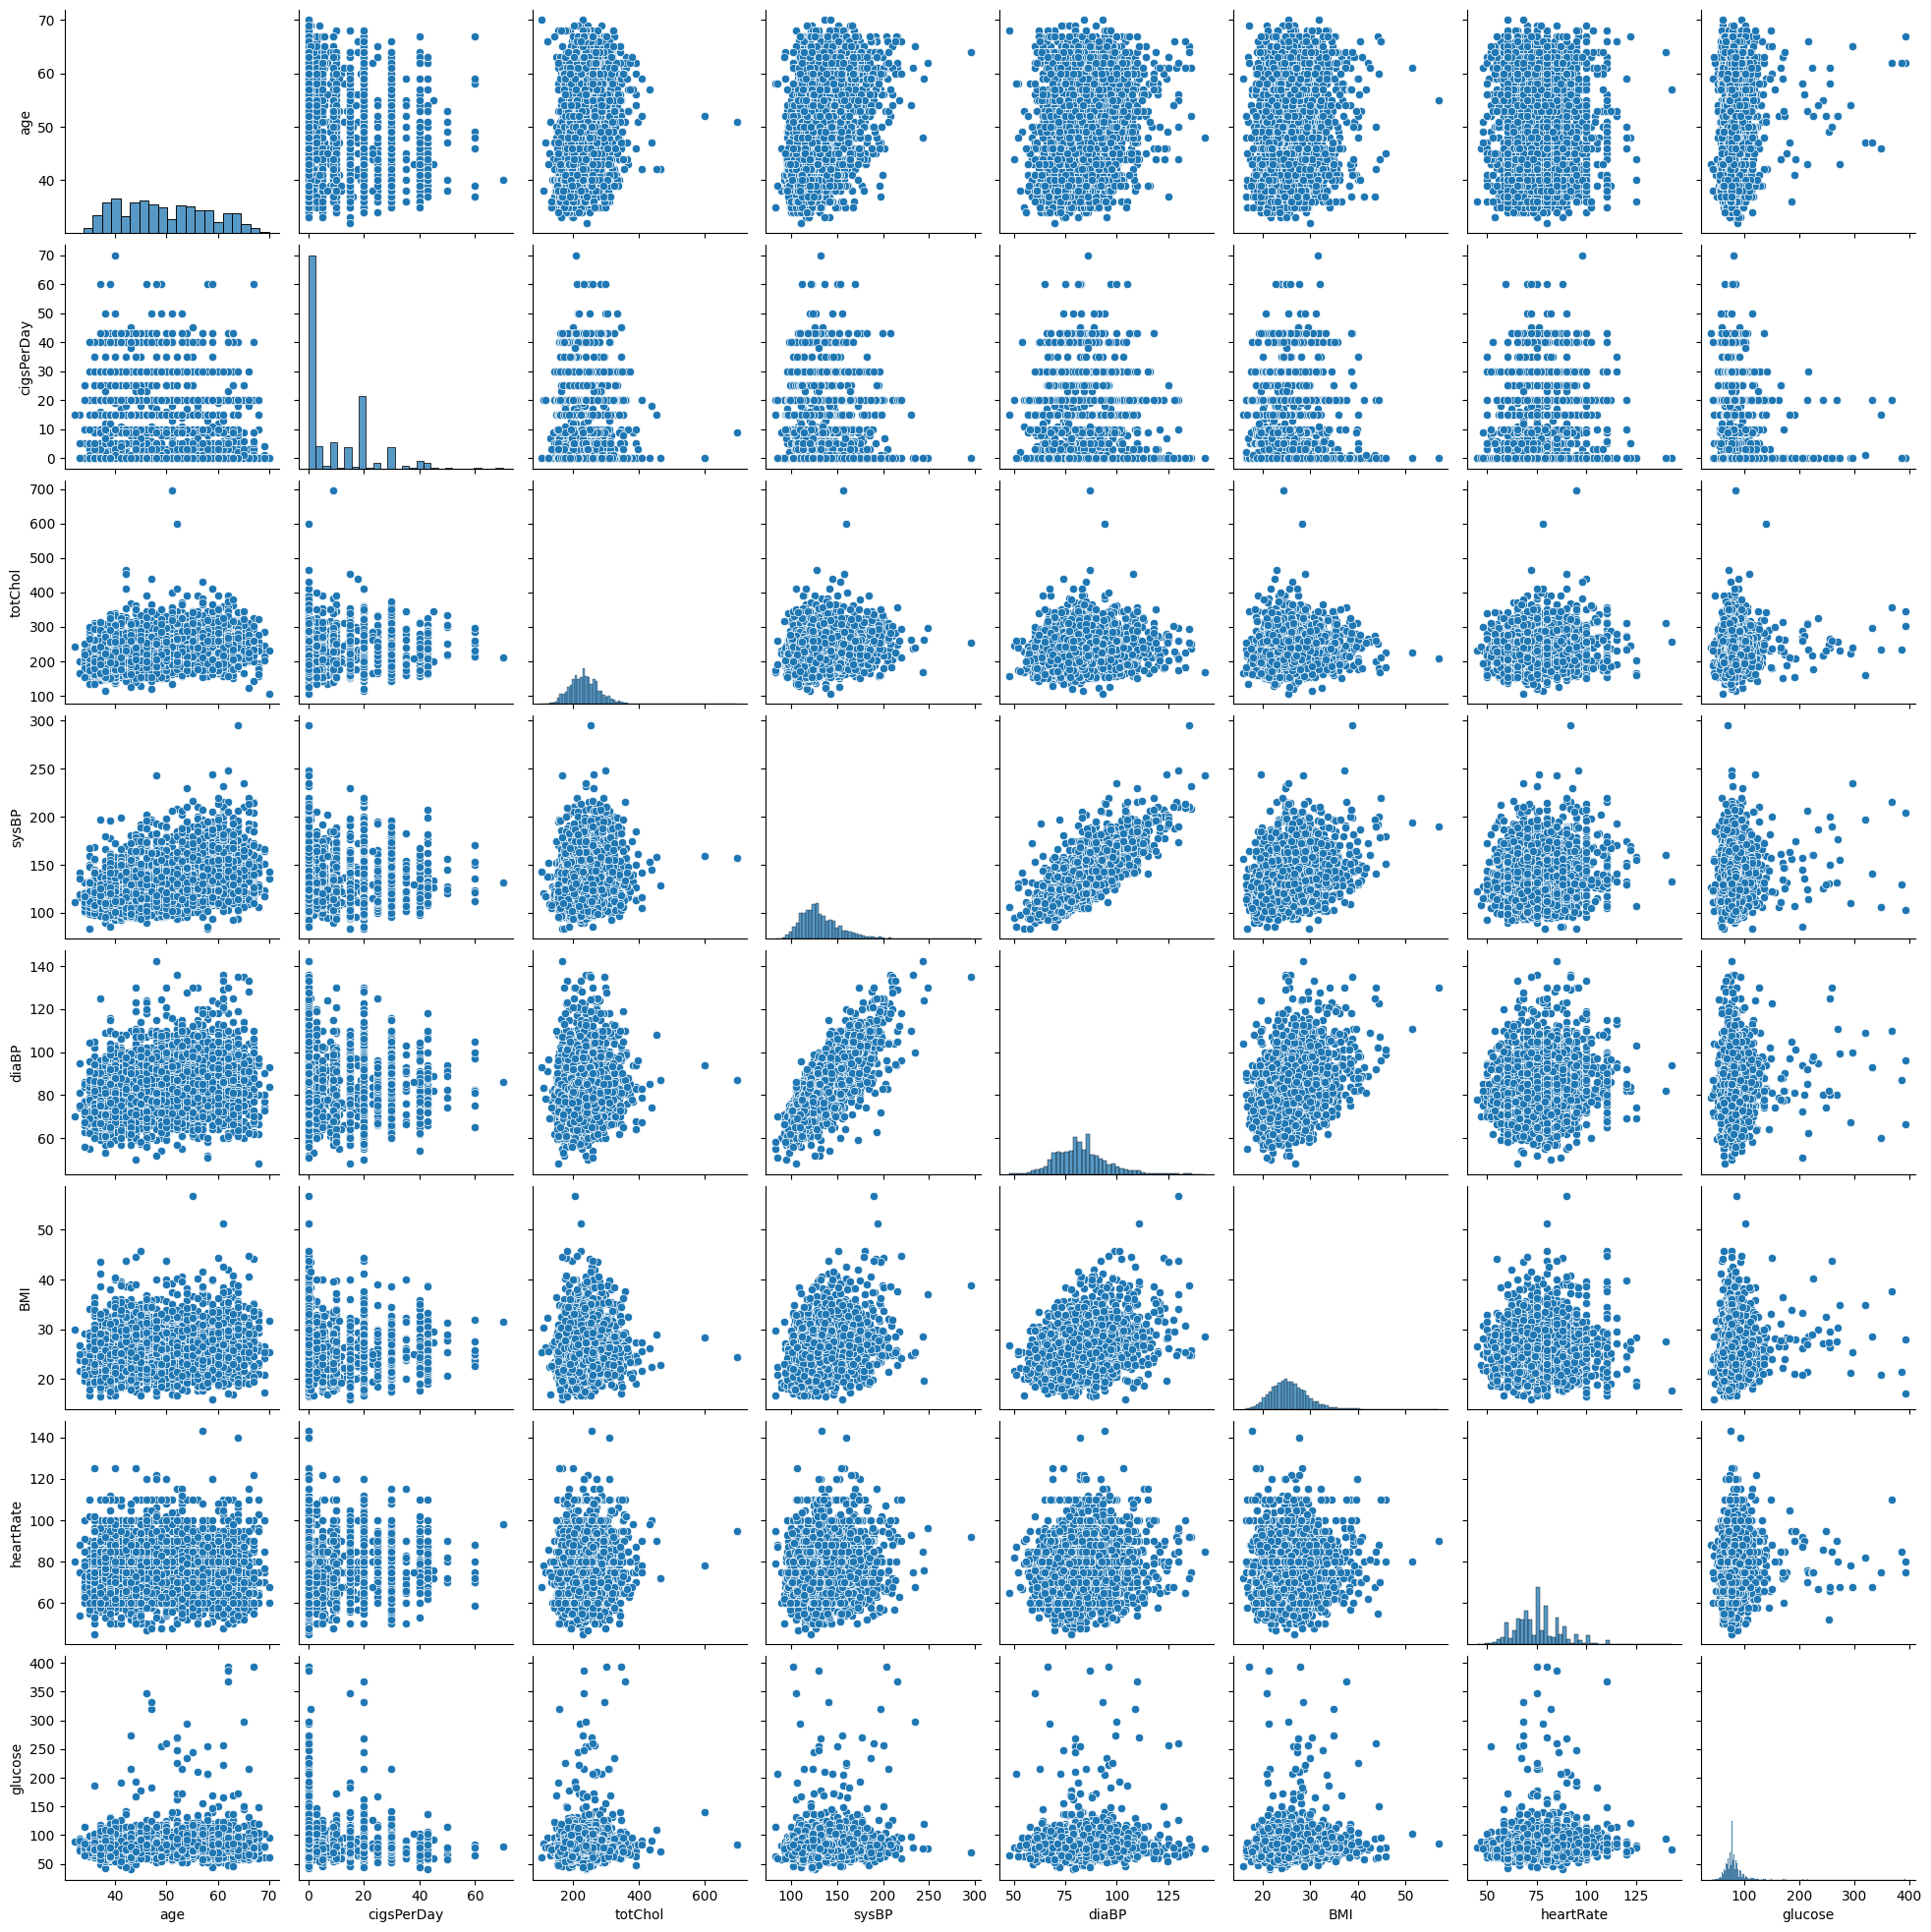

In [36]:
# Pair Plot visualization code
sns.pairplot(df[continous_variable])

##### 1. Why did you pick the specific chart?

The pair plot is a valuable tool to explore the associations between the continuous variables in a dataset. It provides an efficient way to detect linear or non-linear relationships between the variables, and also allows the identification of potential outliers or anomalies in the data.





##### 2. What is/are the insight(s) found from the chart?

The pair plot provides insights into the pairwise relationships between the continuous variables. Positive correlations are observed between certain variables, such as age and systolic blood pressure, as well as between BMI and glucose levels. Linear correlations are also observed between systolic blood pressure and diastolic blood pressure. Additionally, a weak positive correlation is observed between cigsPerDay and sysBP. However, no clear linear relationship is observed between any of the variables and the target variable, TenYearCHD.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1.Higher total cholesterol levels are associated with an increased risk of CHD.

2.Diabetic patients are at a higher risk of developing CHD than non-diabetic patients.

3.Individuals above the age of 50 are more likely to be at risk of TenYearCHD.

### Hypothetical Statement - 1) Higher total cholesterol levels are associated with an increased risk of CHD

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis - There is no difference in the mean total cholesterol levels between the two groups

Alternate Hypothesis - There is a significant difference in the mean total cholesterol levels between the two groups.

#### 2. Perform an appropriate statistical test.

In [37]:
# Perform Statistical Test to obtain P-Value

# Import the required statistical test module from scipy
import scipy.stats as stats

# Separate the dataset into two groups based on CHD status
chd = df[df['TenYearCHD'] == 1] # Patients with CHD
no_chd = df[df['TenYearCHD'] == 0] # Patients without CHD

# Perform a two-sample t-test to compare the mean total cholesterol levels of the two groups
t_stat, p_val = stats.ttest_ind(chd['totChol'], no_chd['totChol'], equal_var=False)

# Print the calculated t-statistic and p-value
print('t_stat=%.3f, p_val=%.3f' % (t_stat, p_val))

# Determine if the null hypothesis should be rejected based on the p-value
if p_val < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

# Print the p-value
print('p-value:', p_val)

t_stat=5.065, p_val=0.000
Reject the null hypothesis
p-value: 5.310852329016036e-07


The p-value of 5.310852329016078e-07 is statistically significant as it is much smaller than the significance level of 0.05.

Rejecting the null hypothesis, we can conclude that there is a significant difference in total cholesterol levels between the two groups (CHD and no CHD).

This finding suggests that higher total cholesterol levels are positively associated with an increased risk of CHD.

The t-statistic of 5.065 further confirms this result as it indicates a significant difference between the means of the two groups in terms of total cholesterol levels.

##### Which statistical test have you done to obtain P-Value?

To evaluate the significance of the difference in mean total cholesterol levels between the two groups, a two-sample t-test was conducted. This statistical test was applied to compare the mean values of total cholesterol in the group with CHD and the group without CHD.

##### Why did you choose the specific statistical test?

The hypothesis "Higher total cholesterol levels are associated with an increased risk of CHD." led to the use of a two-sample t-test, which is appropriate for comparing the mean total cholesterol levels of two independent groups: those with CHD and those without. Since CHD status is a dichotomous outcome variable, the means of the two groups are compared to assess if there is a significant difference in total cholesterol levels. The two-sample t-test assumes that the data is normally distributed and that the variances of the two groups are unequal.





### Hypothetical Statement - 2) Diabetic patients are at a higher risk of developing CHD than non-diabetic patients

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: There is no significant difference in the risk of developing CHD between diabetic and non-diabetic patients.

Alternative hypothesis: Diabetic patients are at a higher risk of developing CHD than non-diabetic patients.

#### 2. Perform an appropriate statistical test.

In [38]:
# Perform Statistical Test to obtain P-Value

import scipy.stats as stats

# Separate the dataset into two groups based on diabetic status
diabetic = df[df['diabetes'] == 1]
non_diabetic = df[df['diabetes'] == 0]

# Perform a two-sample t-test to compare the mean TenYearCHD rates of the two groups
t_stat, p_val = stats.ttest_ind(diabetic['TenYearCHD'], non_diabetic['TenYearCHD'], equal_var=False)

print('t_stat=%.3f, p_val=%.3f' % (t_stat, p_val))
if p_val > 0.05:
    print('Accept Null Hypothesis')
else:
    print('Reject Null Hypothesis')

# Print the p-value
print('p-value:', p_val)

t_stat=4.453, p_val=0.000
Reject Null Hypothesis
p-value: 2.463686008547406e-05


The t-statistic represents the difference in means between diabetic and non-diabetic patients, standardized by the standard error of the difference. Meanwhile, the p-value indicates the probability of observing a difference in means as large or larger than what was found in the data, assuming that the null hypothesis is true.

Since the obtained p-value of 0.000 is smaller than the significance level of 0.05, it suggests that the likelihood of seeing such a difference in means by chance is quite low. Hence, we reject the null hypothesis and conclude that diabetic patients have a greater risk of developing CHD than non-diabetic patients.

##### Which statistical test have you done to obtain P-Value?

The two-sample t-test was used to obtain the p-value for the hypothesis "Diabetic patients are at a higher risk of developing CHD than non-diabetic patients."

##### Why did you choose the specific statistical test?

We chose to use the two-sample t-test since we are interested in comparing the means of two independent groups (diabetic vs non-diabetic) in relation to the binary outcome variable of CHD risk. This test is suitable for this type of analysis as it enables us to examine whether there is a significant difference between the means of the two groups. Moreover, due to the relatively large sample sizes of both groups, the t-test is considered a robust and dependable test to use.

### Hypothetical Statement - 3) Individuals above the age of 50 are more likely to be at risk of TenYearCHD.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis - Age has no effect on the risk of TenYearCHD.

Alternative hypothesis - Patients over 50 years of age have a higher risk of TenYearCHD than those who are under 50 years of age.

#### 2. Perform an appropriate statistical test.

In [39]:
# Perform Statistical Test to obtain P-Value
import statsmodels.stats.proportion as smp

# Separate the dataset into two groups based on age
above_50 = df[df['age'] > 50]
below_50 = df[df['age'] <= 50]

# Calculate the proportion of patients with TenYearCHD in each group
prop_above_50 = above_50['TenYearCHD'].mean()
prop_below_50 = below_50['TenYearCHD'].mean()

# Perform a one-tailed z-test to compare the proportions of the two groups
z_score, p_val = smp.proportions_ztest([prop_above_50 * len(above_50), prop_below_50 * len(below_50)], [len(above_50), len(below_50)], alternative='larger')

print('z_score=%.3f, p_val=%.3f' % (z_score, p_val))

if p_val < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Accept Null Hypothesis')

# Print the p-value
print('p-value:', p_val)
     

z_score=11.155, p_val=0.000
Reject Null Hypothesis
p-value: 3.388983060064358e-29


The results of the test reveal that the likelihood of chance being responsible for the variation in the proportion of TenYearCHD risk between patients aged above 50 and those below 50 is very low. Therefore, we reject the null hypothesis and conclude that patients who are above 50 years of age have a significantly higher risk of TenYearCHD than those who are below 50 years of age.

##### Which statistical test have you done to obtain P-Value?

I used a one-tailed Z-test to compare the proportions of patients with TenYearCHD above and below 50 years of age.

##### Why did you choose the specific statistical test?

To determine if patients above 50 years of age have a higher risk of TenYearCHD than those below 50 years, a one-tailed z-test was selected. This test was chosen because we are specifically interested in whether the proportion of TenYearCHD in the group above 50 years is greater than the proportion in the group below 50 years. A z-test is appropriate in this case because we have a large sample size, and it allows for the comparison of proportions between two groups.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [40]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no remaining null values in our dataset as we have already processed and handled them in data wrangling.

### 2. Handling Outliers

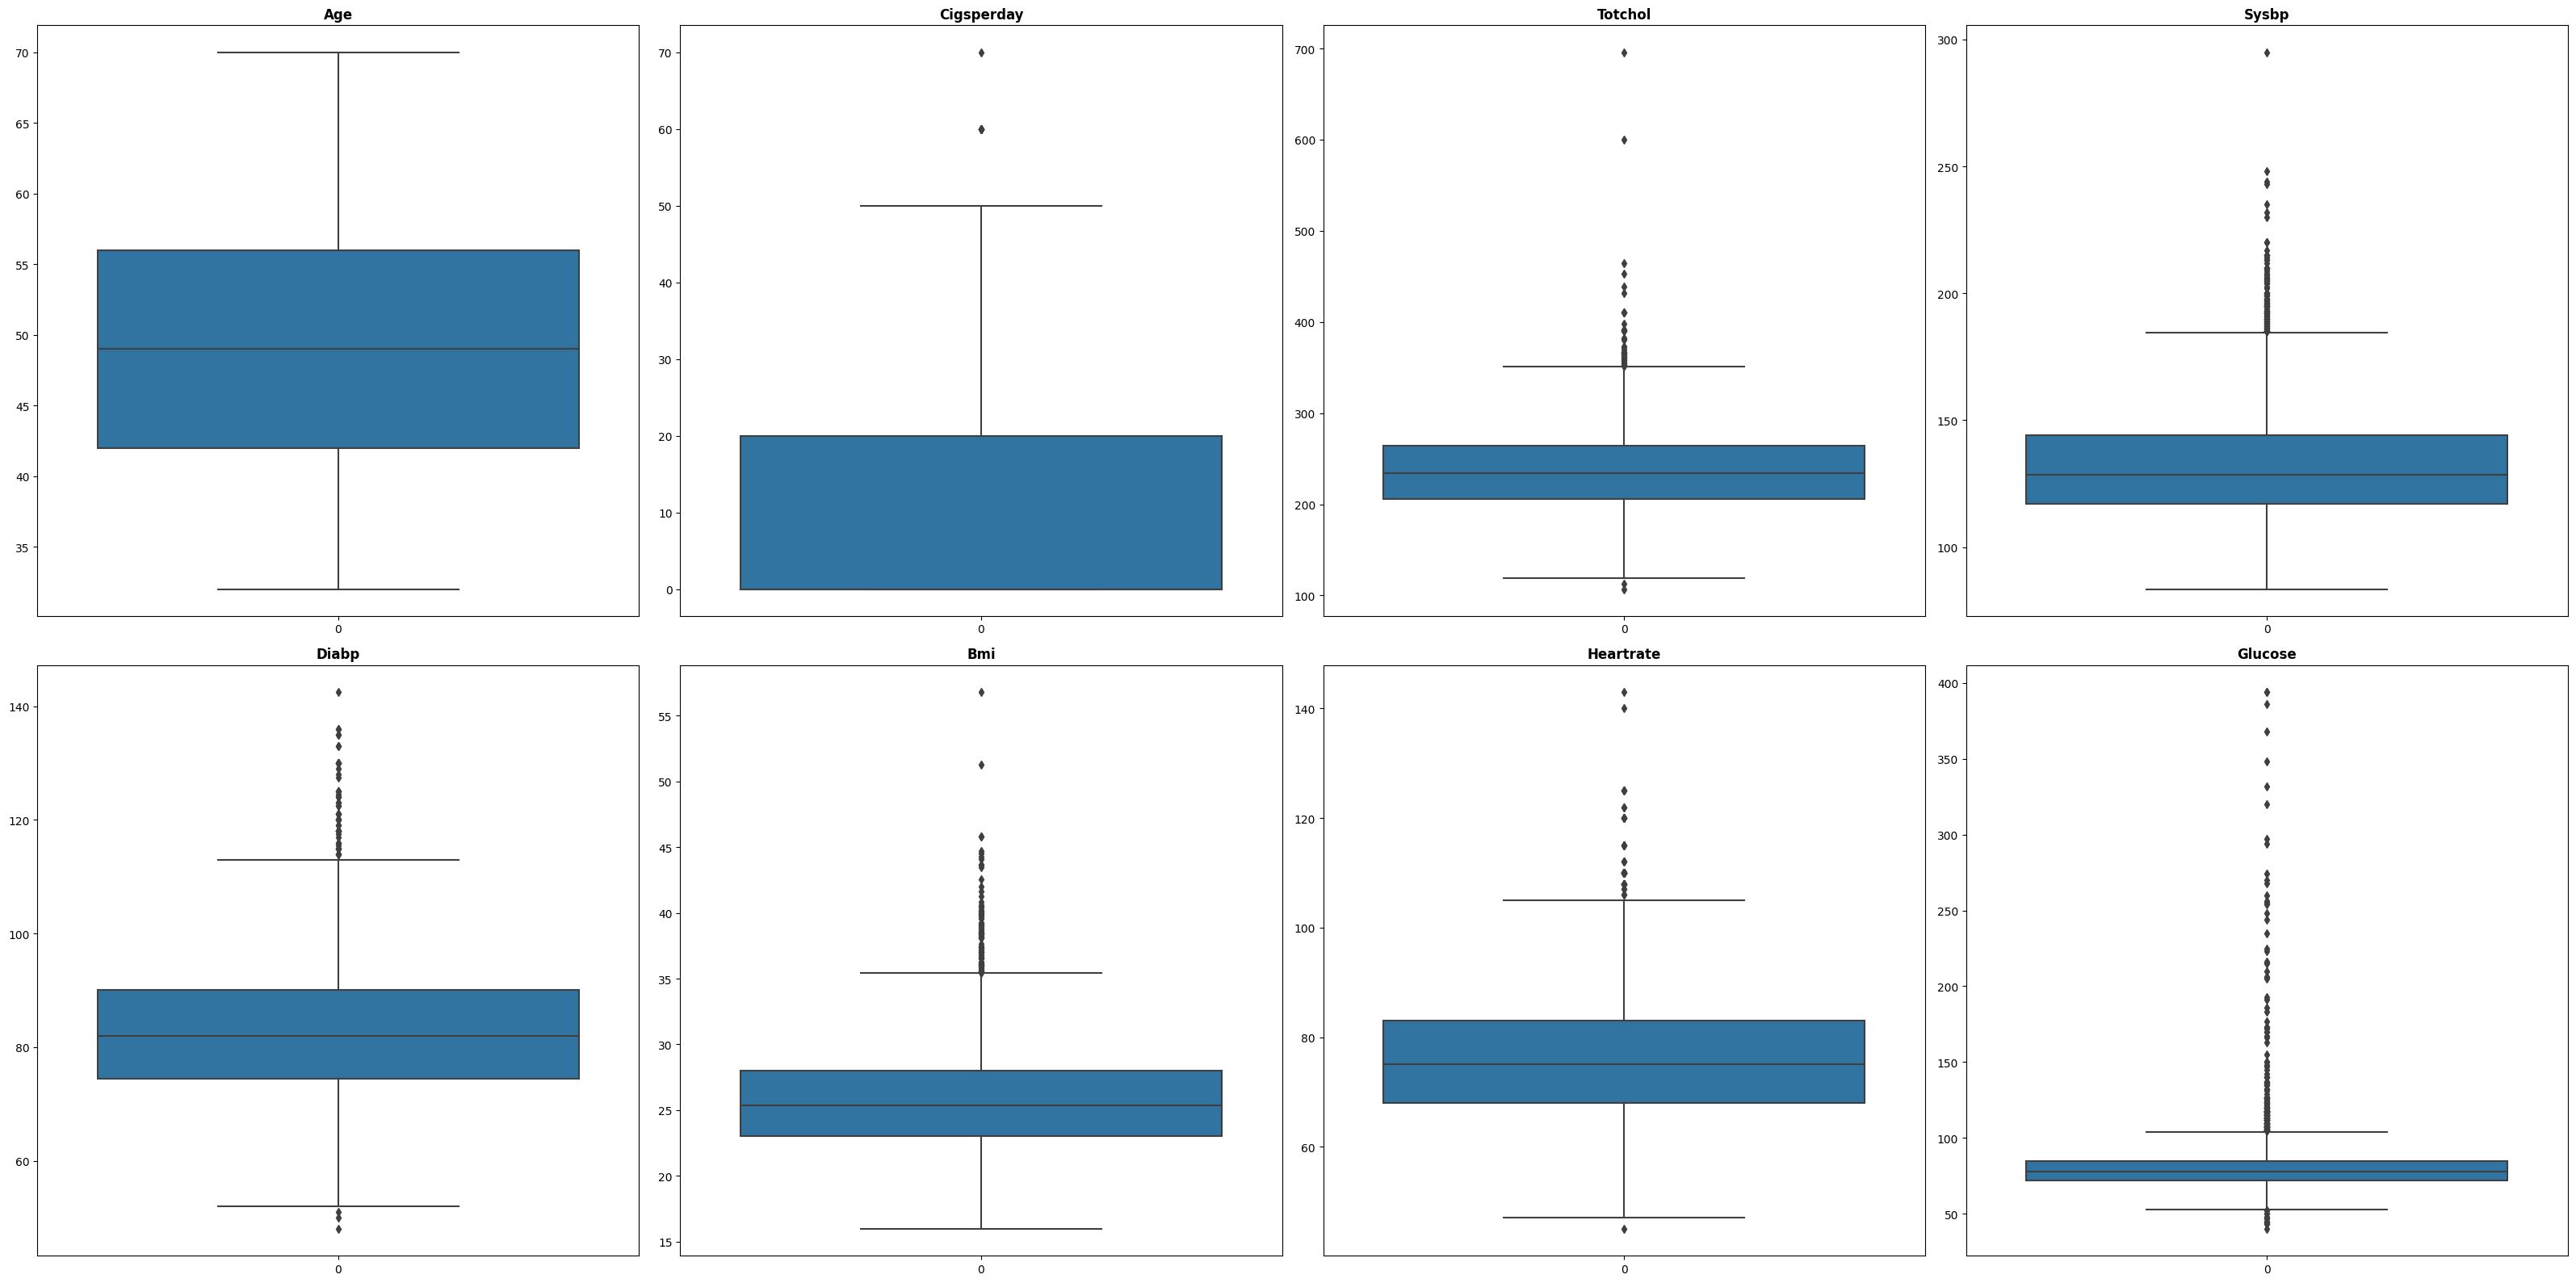

In [41]:
# Handling Outliers & Outlier treatments
fig, axes = plt.subplots(2, 4, figsize=(32, 16))
axes = axes.flatten()
for ax, col in zip(axes, continous_variable):
    sns.boxplot(df[col], ax=ax)
    ax.set_title(col.title(), weight='bold')
plt.tight_layout()

In [42]:
## fuction to create dataframe of total outliers and percentage of outliers
def outliers_df(df, continuous_features):
    outlier_df = pd.DataFrame(columns=['feature', 'lower_limit', 'upper_limit',
                                       'IQR', 'total_outliers', 'percentage_outliers(%)'])
    for feature in continuous_features:
        values = df[feature]
        q1, q2, q3 = values.quantile([0.25, 0.5, 0.75])
        iqr = q3 - q1
        Lower_limit = q1 - 1.5 * iqr
        Upper_limit = q3 + 1.5 * iqr
        outliers = values[(values < Lower_limit) | (values > Upper_limit)]
        total_outliers = len(outliers)
        percentage_outliers = round(total_outliers * 100 / len(values), 2)
        outlier_df = outlier_df.append({'feature': feature,
                                        'lower_limit': Lower_limit,
                                        'upper_limit': Upper_limit,
                                        'IQR': iqr,
                                        'total_outliers': total_outliers, 
                                        'percentage_outliers(%)': percentage_outliers}, 
                                        ignore_index=True)
    return outlier_df.sort_values(by=['percentage_outliers(%)'], ascending=False)
     

In [43]:
outliers_df(df,continous_variable)
     

feature  lower_limit  upper_limit      IQR total_outliers  \
7     glucose     52.50000    104.50000  13.0000            214   
3       sysBP     76.50000    184.50000  27.0000            105   
5         BMI     15.57875     35.44875   4.9675             79   
6   heartRate     45.50000    105.50000  15.0000             64   
4       diaBP     51.25000    113.25000  15.5000             58   
2     totChol    119.00000    351.00000  58.0000             43   
1  cigsPerDay    -30.00000     50.00000  20.0000              9   
0         age     21.00000     77.00000  14.0000              0   

   percentage_outliers(%)  
7                    6.31  
3                    3.10  
5                    2.33  
6                    1.89  
4                    1.71  
2                    1.27  
1                    0.27  
0                    0.00

Due to the potential presence of critical patients among the outliers, moving all of them into the 25-75 interquartile range may not be a suitable approach for this dataset.

There are various methods available for treating outliers in a dataset, including Winsorization, Robust statistical methods, Removing outliers, and Transformation, which involves applying mathematical functions such as logarithmic, square root, or reciprocal to the data to normalize its distribution and mitigate the impact of outliers.

Regarding the third sentence, a possible rephrasing could be: "Although Removing outliers is one of the methods commonly used to deal with outliers, it can lead to a loss of information and a decrease in the sample size.

In light of the potential drawbacks of Removing outliers and the importance of preserving the sample size and information, we opt to employ transformation as a means of dealing with outliers in this dataset.

In [44]:
# applying transformation for treating outlier 
df[continous_variable] = np.log(df[continous_variable] +1 )

##### What all outlier treatment techniques have you used and why did you use those techniques?

I used LOG TRANSFORMATION method to remove outlier from the dataset.

I used this method because it is a statistical model and easy to implement yet it shows effective results.

This transformaton can also help to normalize the distribution of the data and make it more symmetrical.

### 3. Categorical Encoding

In [45]:
# Encode your categorical columns
df['sex'] = pd.get_dummies(df['sex'], drop_first=True)
df['is_smoking'] = pd.get_dummies(df['is_smoking'], drop_first=True)


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   float64
 2   education        3390 non-null   float64
 3   sex              3390 non-null   uint8  
 4   is_smoking       3390 non-null   uint8  
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(10)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Since machine learning algorithms typically require input in a numerical format, it is necessary to convert categorical variables into numerical ones. Therefore, we are using one-hot encoding to transform the non-numeric variables 'sex' and 'is_smoking' into binary values (0 or 1).

The get_dummies() function from the pandas library is being utilized to generate dummy variables that represent the categories of each variable as individual binary columns.

True parameter is being employed to prevent multicollinearity, which can arise when two dummy variables are highly correlated, by eliminating the first column of each set of dummy variables.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [47]:
# Manipulate Features to minimize feature correlation and create new features

As we observed from the correlation heatmap, there is a strong correlation between Systolic Blood Pressure and Diastolic Pressure. Therefore, we are generating a new feature that will indicate whether an individual has a blood pressure problem or not.

In [48]:
df.head()

id       age  education  sex  is_smoking  cigsPerDay  BPMeds  \
0   0  4.174387        2.0    0           1    1.386294     0.0   
1   1  3.610918        4.0    1           0    0.000000     0.0   
2   2  3.850148        1.0    0           1    2.397895     0.0   
3   3  3.931826        1.0    1           1    3.044522     0.0   
4   4  4.174387        1.0    0           1    3.433987     0.0   

   prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
0                0             0         0  5.402677  5.003946  4.454347   
1                0             1         0  5.361292  5.129899  4.595120   
2                0             0         0  5.525453  4.762174  4.276666   
3                0             1         0  5.455321  5.068904  4.488636   
4                0             0         0  5.488938  4.923624  4.454347   

        BMI  heartRate   glucose  TenYearCHD  
0  3.272606   4.510860  4.394449           1  
1  3.426540   4.290459  4.330733           0  
2  3.061052   4.488636  4.553877           0  
3  3.376221   4.234107  4.553877           1  
4  3.311273   4.262680  4.356709           0

After conducting a more in-depth analysis of heart-related problems, it was discovered that pulse pressure, defined as the difference between systolic and diastolic blood pressure, has a significant effect on CHD. Consequently, we can generate a new feature named PP (pulse pressure), which consolidates the systolic and diastolic blood pressure measurements into a solitary column.

In [49]:
# Adding pulse pressure as a column
df['pulsePressure'] = df['sysBP'] - df['diaBP']
     

In [50]:
df.head()

id       age  education  sex  is_smoking  cigsPerDay  BPMeds  \
0   0  4.174387        2.0    0           1    1.386294     0.0   
1   1  3.610918        4.0    1           0    0.000000     0.0   
2   2  3.850148        1.0    0           1    2.397895     0.0   
3   3  3.931826        1.0    1           1    3.044522     0.0   
4   4  4.174387        1.0    0           1    3.433987     0.0   

   prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
0                0             0         0  5.402677  5.003946  4.454347   
1                0             1         0  5.361292  5.129899  4.595120   
2                0             0         0  5.525453  4.762174  4.276666   
3                0             1         0  5.455321  5.068904  4.488636   
4                0             0         0  5.488938  4.923624  4.454347   

        BMI  heartRate   glucose  TenYearCHD  pulsePressure  
0  3.272606   4.510860  4.394449           1       0.549599  
1  3.426540   4.290459  4.330733           0       0.534779  
2  3.061052   4.488636  4.553877           0       0.485508  
3  3.376221   4.234107  4.553877           1       0.580268  
4  3.311273   4.262680  4.356709           0       0.469277

#### 2. Feature Selection

In [51]:
# Select your features wisely to avoid overfitting

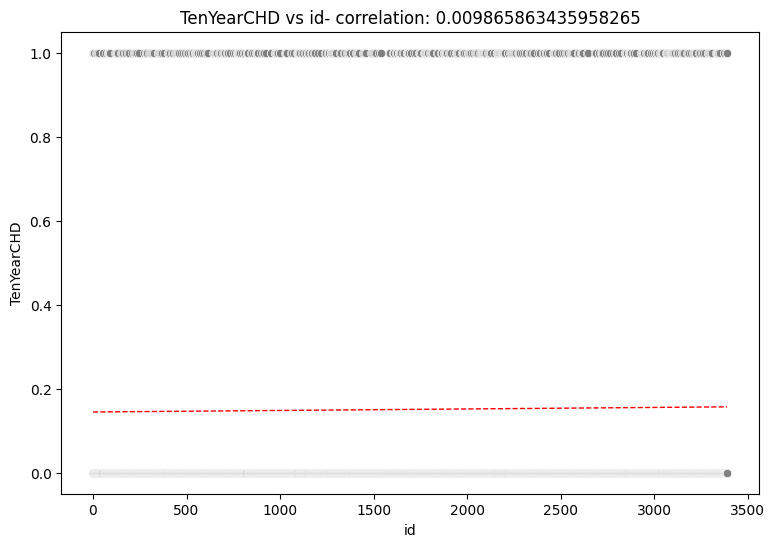

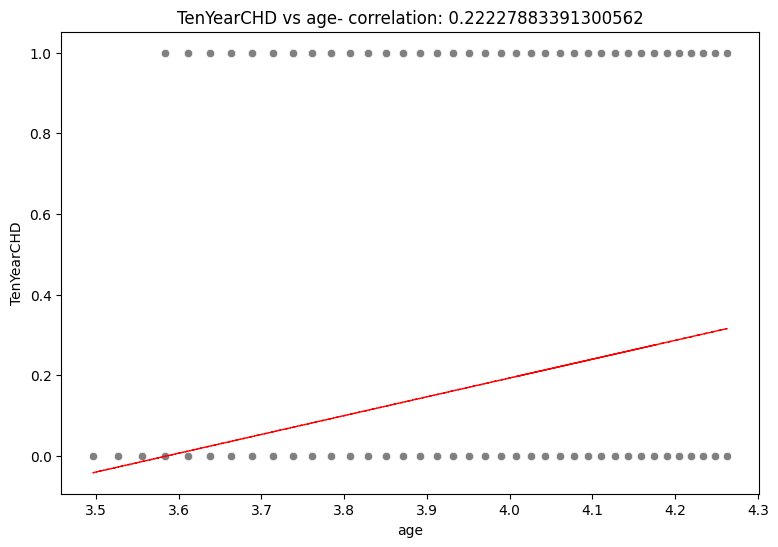

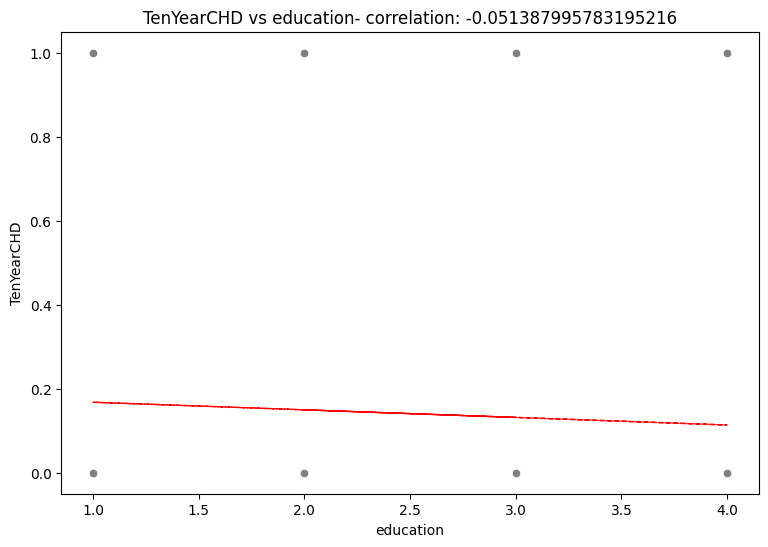

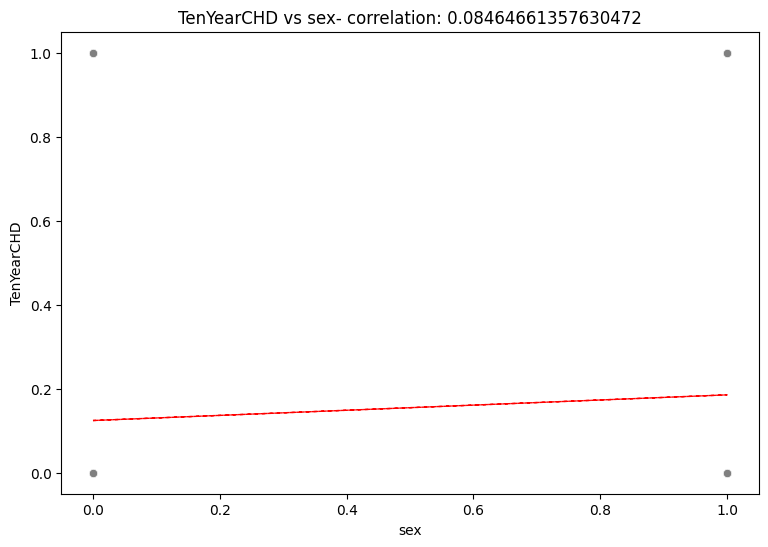

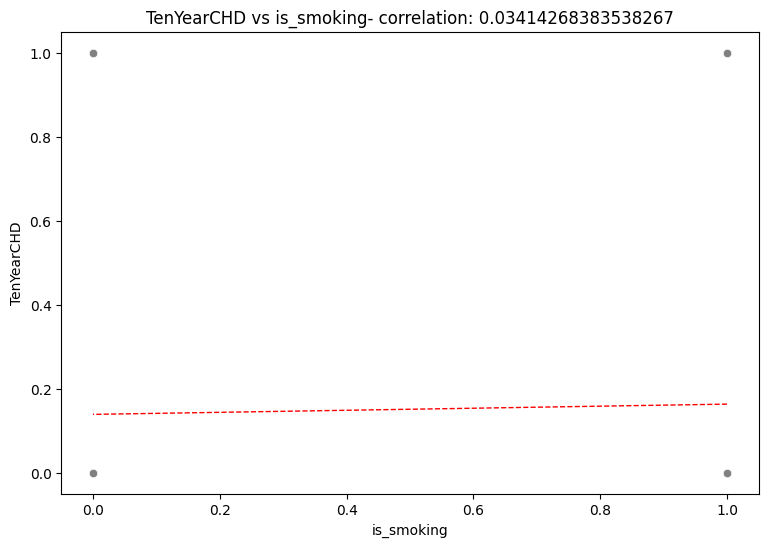

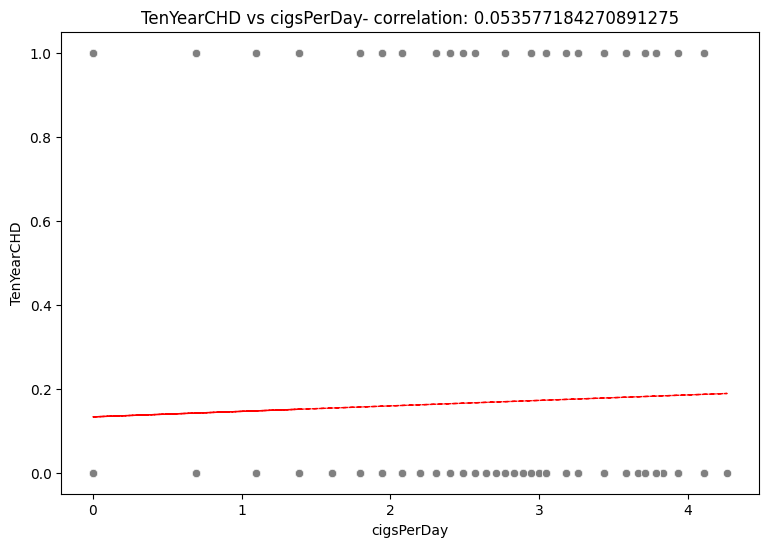

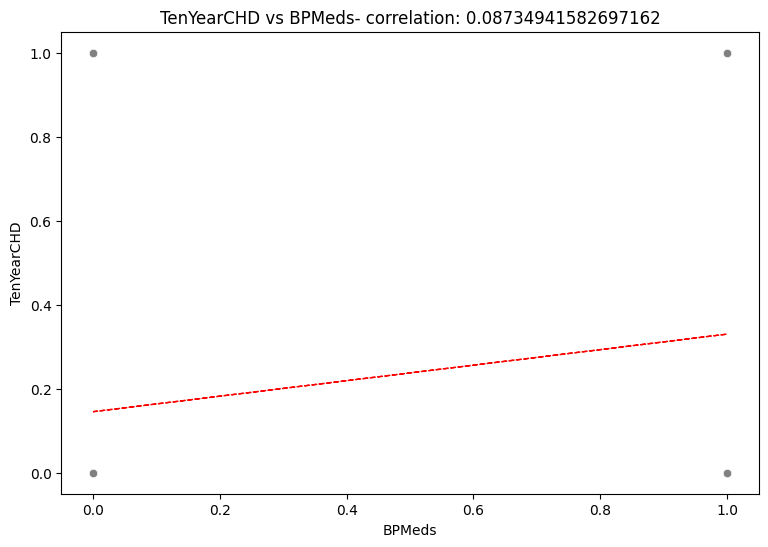

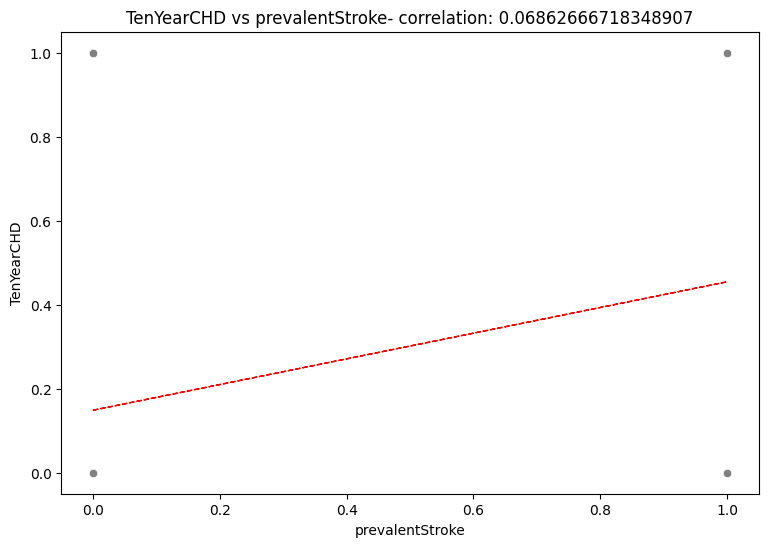

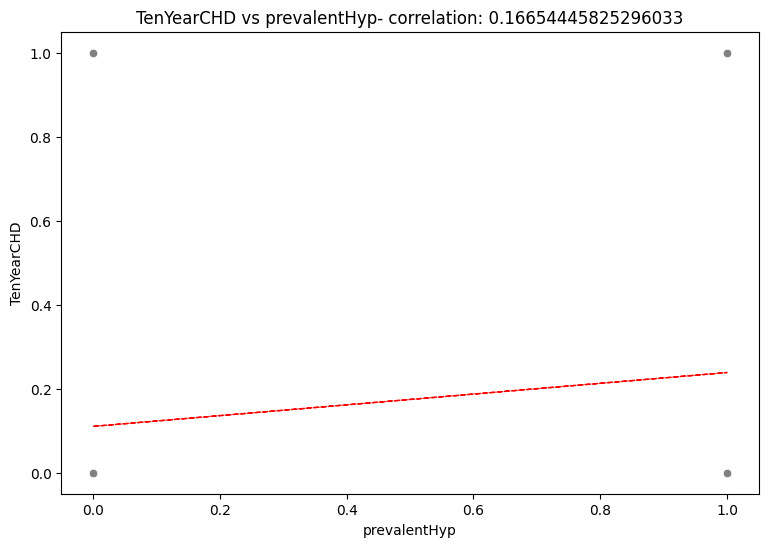

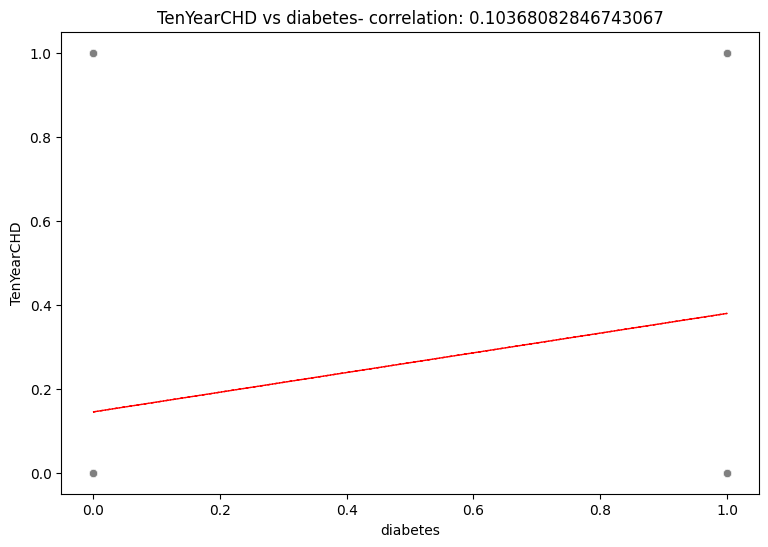

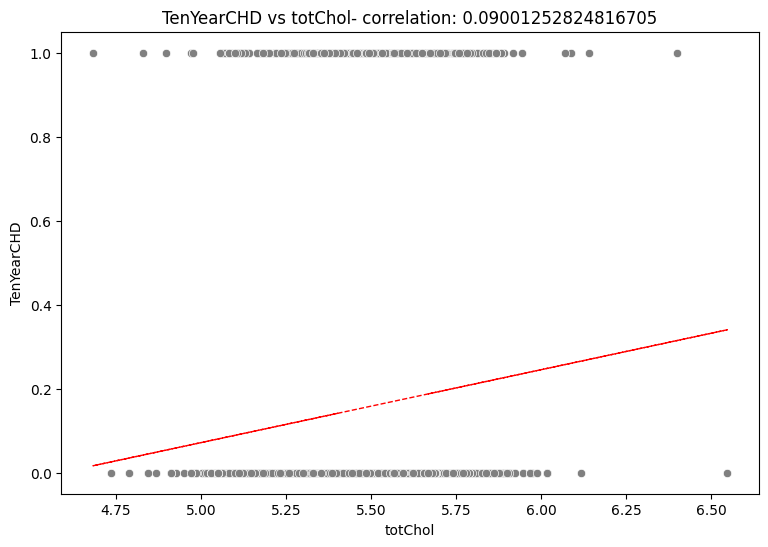

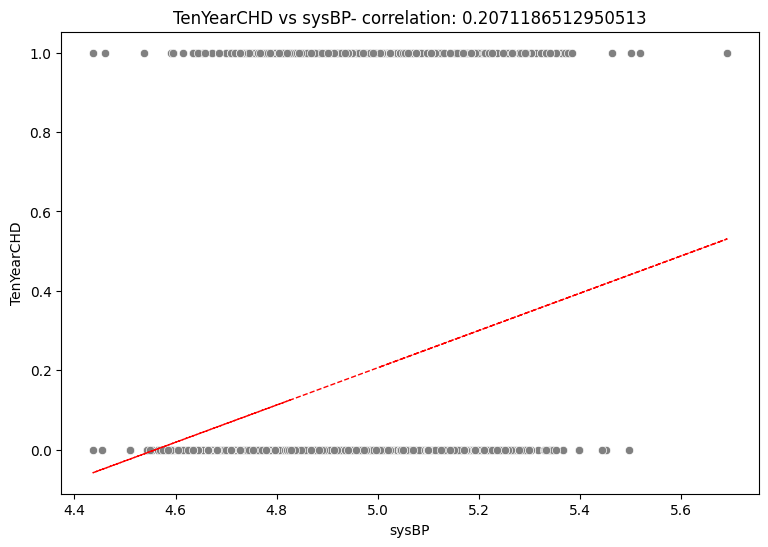

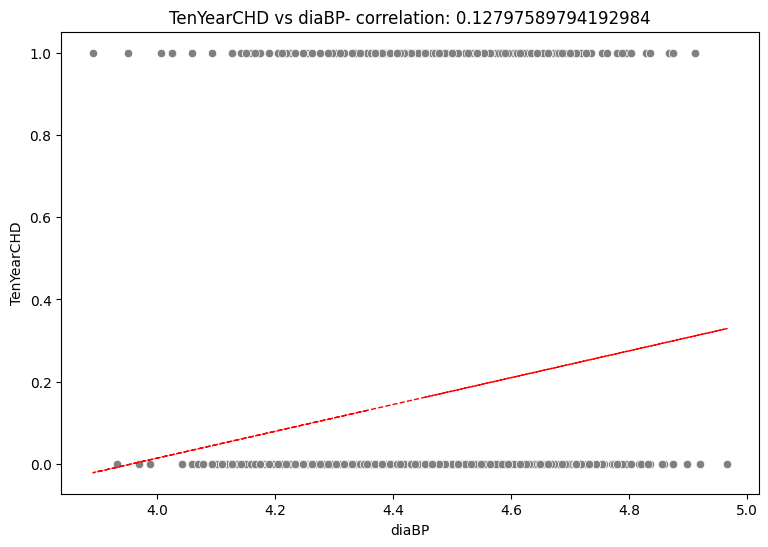

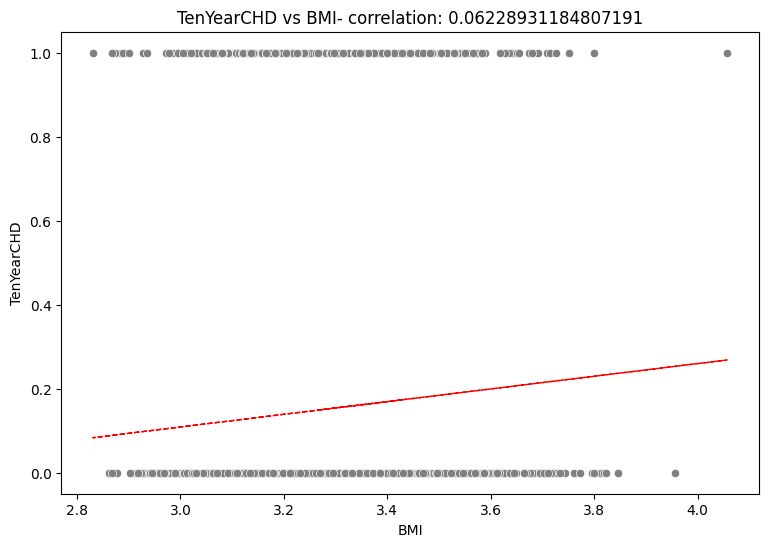

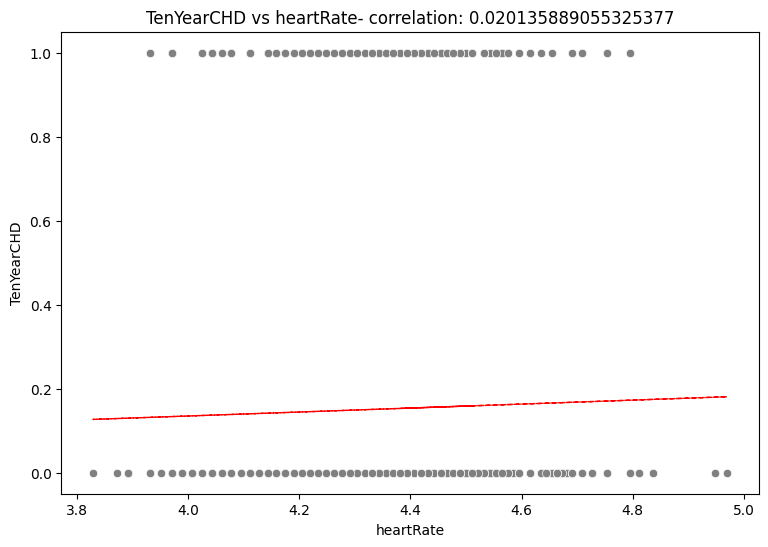

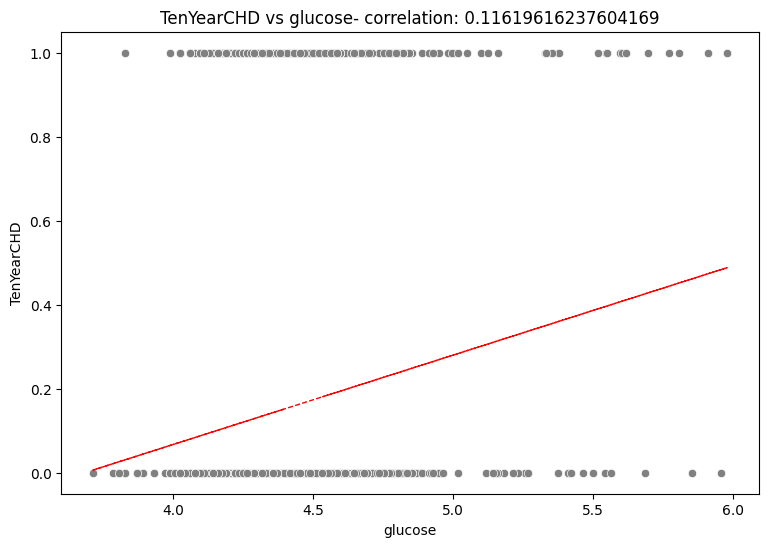

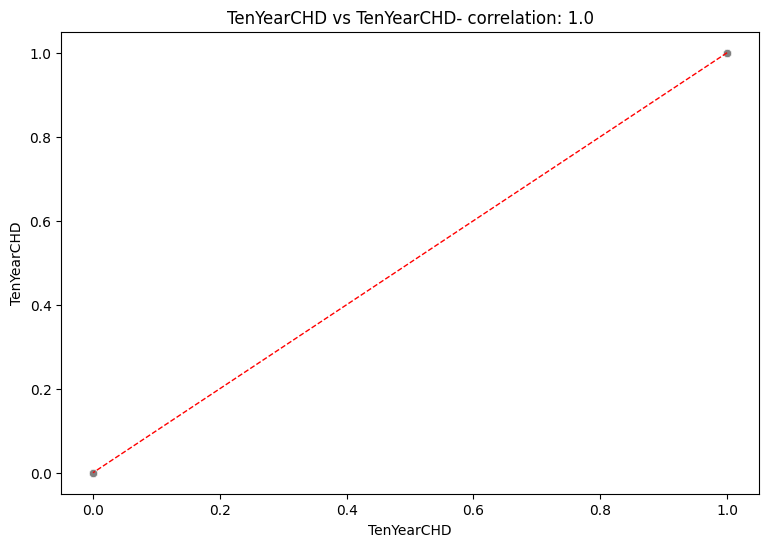

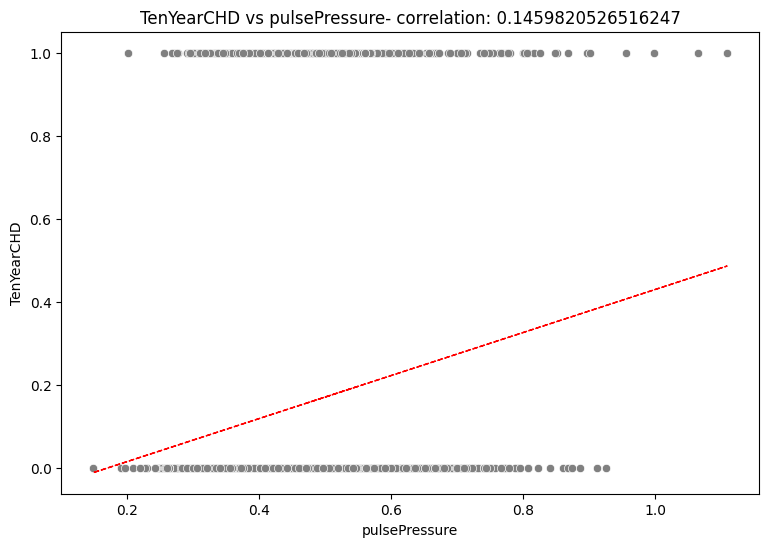

In [52]:
# Let's see how trip_duration and other features are related
for col in df.describe().columns.tolist():
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['TenYearCHD']
    correlation = feature.corr(label)
    sns.scatterplot(x=feature, y=label, color="gray")
    plt.xlabel(col)
    plt.ylabel('TenYearCHD')
    ax.set_title('TenYearCHD vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['TenYearCHD'], 1)
    y_hat = np.poly1d(z)(df[col])
    plt.plot(df[col], y_hat, "r--", lw=1)
    plt.show()

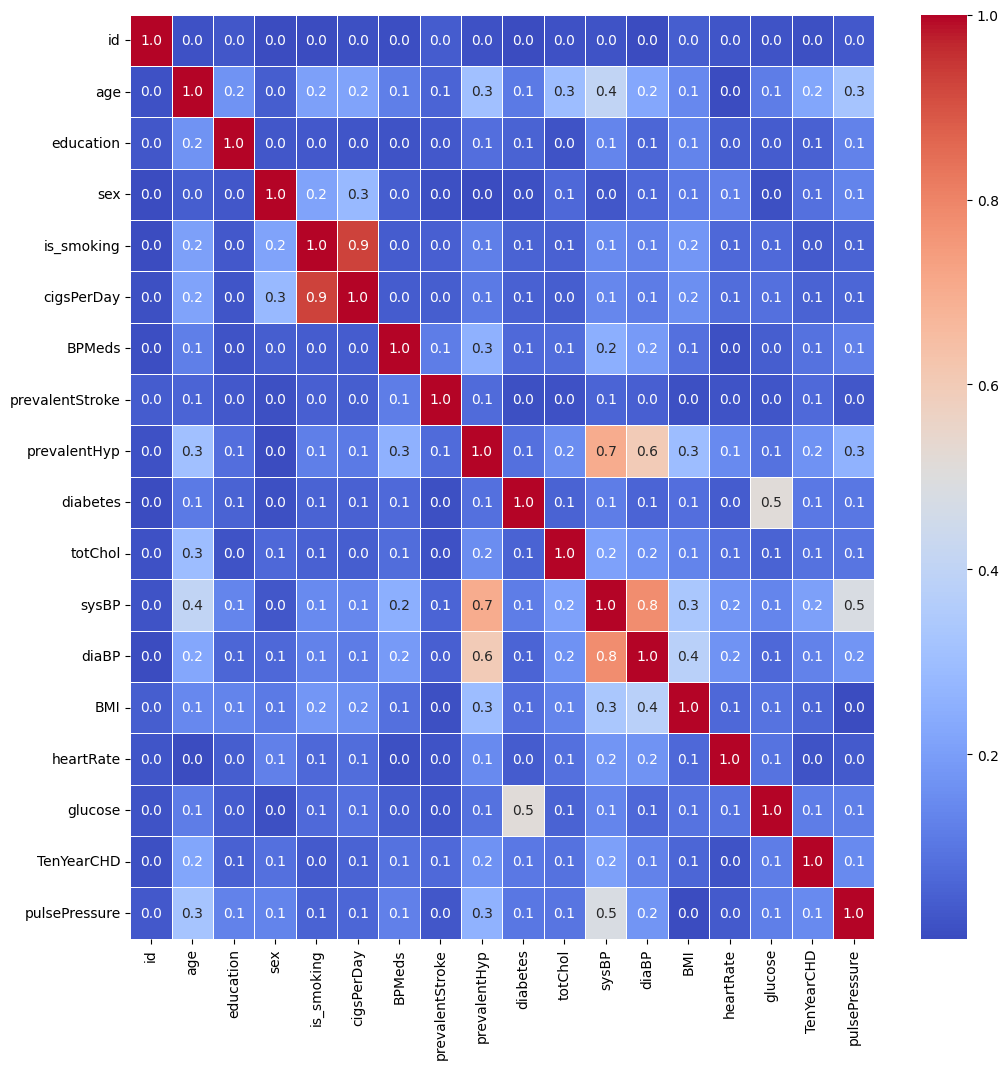

In [53]:
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(abs(round(df.corr(),3)), annot=True, linewidths=.5, fmt= '.1f',cmap='coolwarm',ax=ax)
plt.show()
     

##### What all feature selection methods have you used  and why?

One method of analysis is correlation, which involves measuring the relationship between each feature and the target variable. Features that exhibit a strong correlation with the target variable are usually regarded as effective predictors and are thus chosen for selection.

##### Which all features you found important and why?

1.Based on the heatmap analysis, we have observed a strong correlation between 'sysBP' and 'diaBP'. Since we have already computed a new feature called 'pulsePressure' from them, we are choosing to exclude both 'sysBP' and 'diaBP' from our analysis.

2.The 'id' feature has been deemed less relevant to our analysis, and hence, we are dropping it.

3.There is also a high correlation between the 'is_smoking' and 'cigsPerDay' columns, and therefore, one of them can be dropped if it is not contributing significantly to the target variable.

4.The 'is_smoking' column has been assigned a value of 1 when the number of cigarettes smoked per day is greater than zero. Hence, both 'is_smoking' and the number of cigarettes smoked convey the same information. Therefore, we are removing the 'is_smoking' column.

**Creating Final DataFrame**

In [54]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'pulsePressure'],
      dtype='object')

In [55]:
final_df = df[['age', 'education', 'sex','cigsPerDay', 'BPMeds',
               'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
               'BMI', 'heartRate', 'glucose', 'pulsePressure', 'TenYearCHD']]

<Axes: >

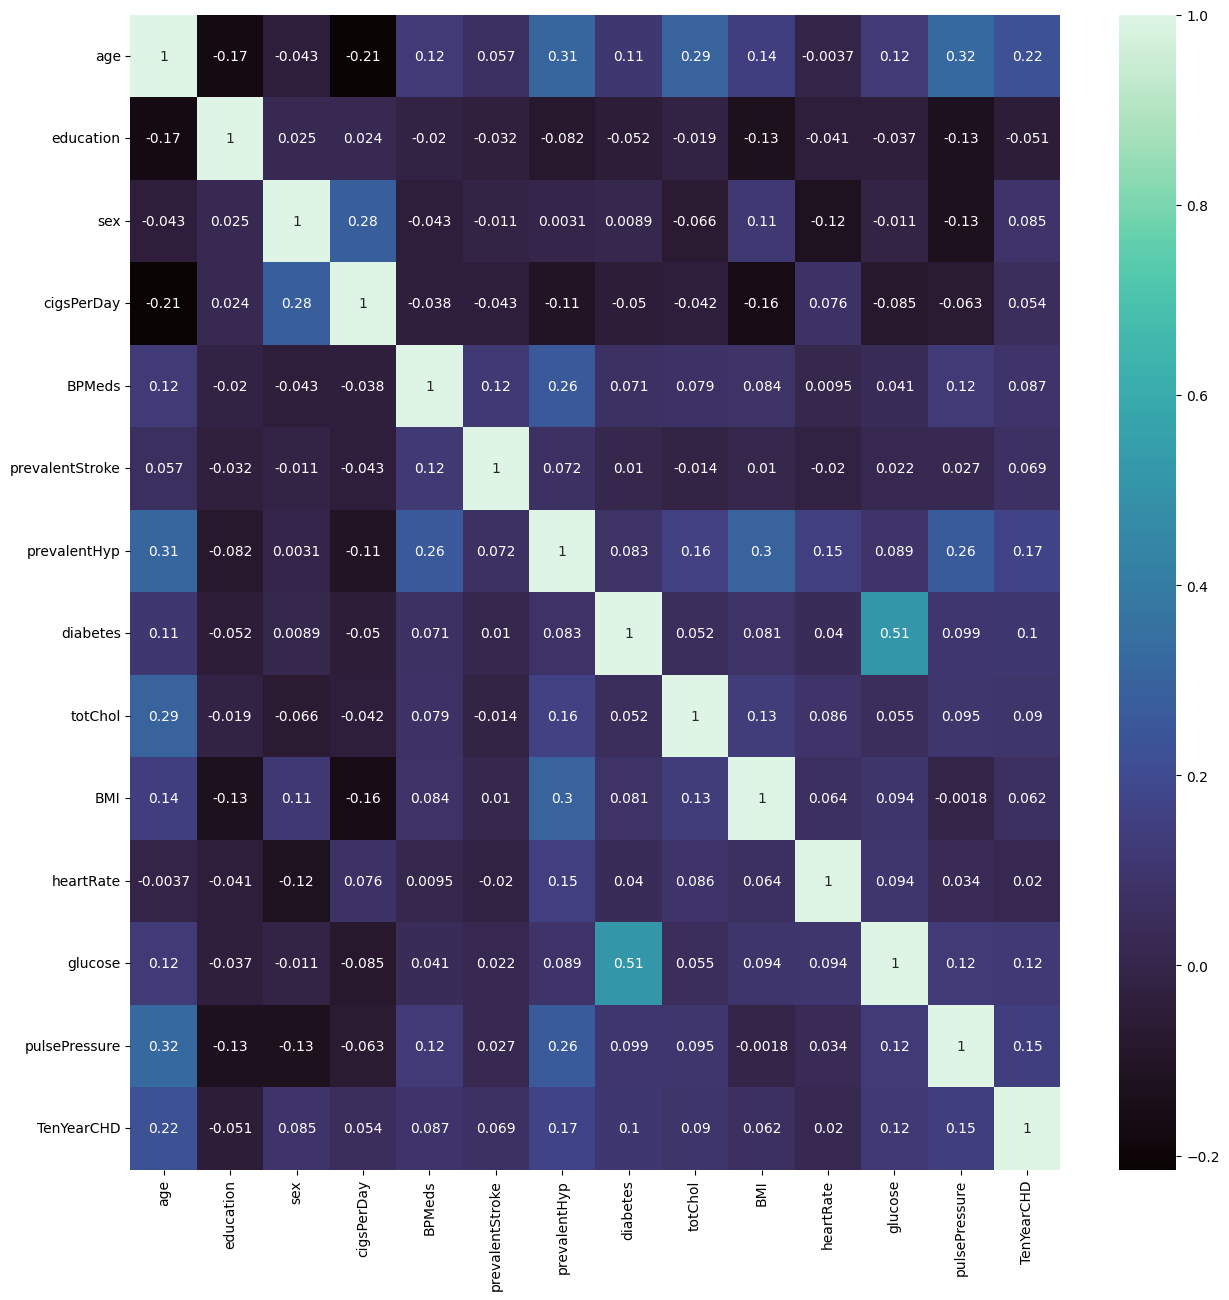

In [56]:
# check for heatmap if anything remains to avoid multicollinearity 
plt.figure(figsize=(15,15))
correlation = final_df.corr()
sns.heatmap((correlation), annot=True, cmap=sns.color_palette("mako", as_cmap=True))

We can see that 'pulsePressure' , 'glucose' and 'prevalentHyp' are moderately correlated to each other so we can keep them.

### 5. Data Transformation

Data Transformation is not required because we already did the transformation when treating outliers.

But, we also updated our dataset, we added new feature as "pulse pressure".

So, we will check for it, if it needs a transformation.

Before Applying Transformation


Text(0.5, 1.0, 'Distribution of pulsePressure')

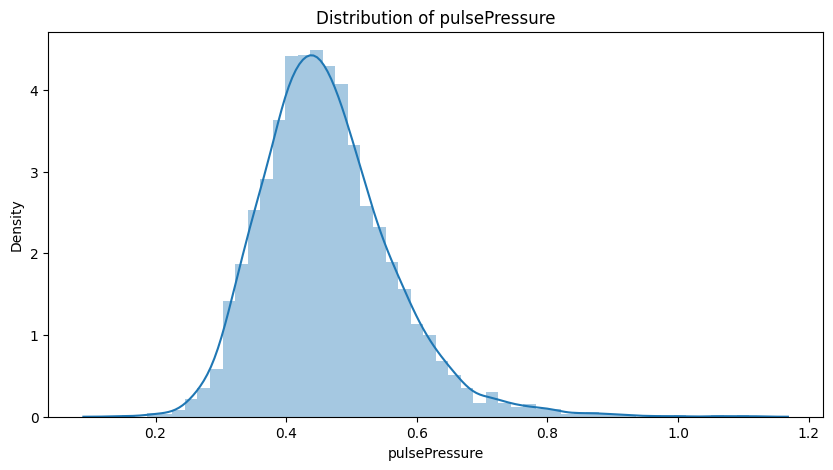

In [57]:
# Checking the distribution of pulse pressure 
plt.figure(figsize=(10,5))
print("Before Applying Transformation")
sns.distplot(df['pulsePressure'])
plt.title('Distribution of pulsePressure')

((array([-3.53427553, -3.29263892, -3.15912694, ...,  3.15912694,
          3.29263892,  3.53427553]),
  array([0.14895586, 0.19166742, 0.19753098, ..., 0.99780759, 1.06471074,
         1.10897508])),
 (0.09881710532327304, 0.46253294418818647, 0.9803376025811831))

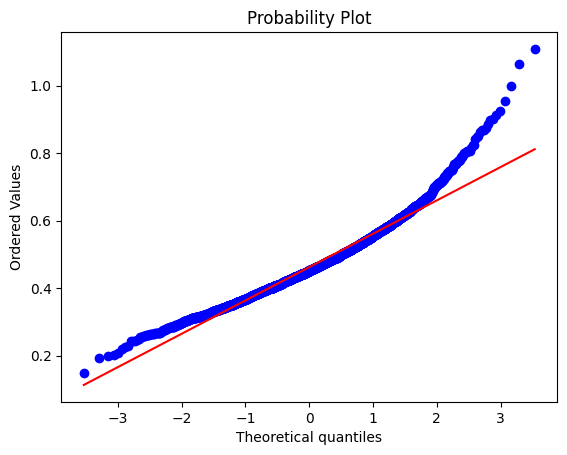

In [58]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
stats.probplot(df['pulsePressure'],dist='norm',plot=pylab)
     

In [59]:
# Creating 5 different copies to check the distribution of the variable
test_df1=final_df.copy()
test_df2=final_df.copy()
test_df3=final_df.copy()
test_df4=final_df.copy()
     

**Logarithmic Transformation**

After Applying Transformation


Text(0.5, 1.0, 'Distribution of pulsePressure')

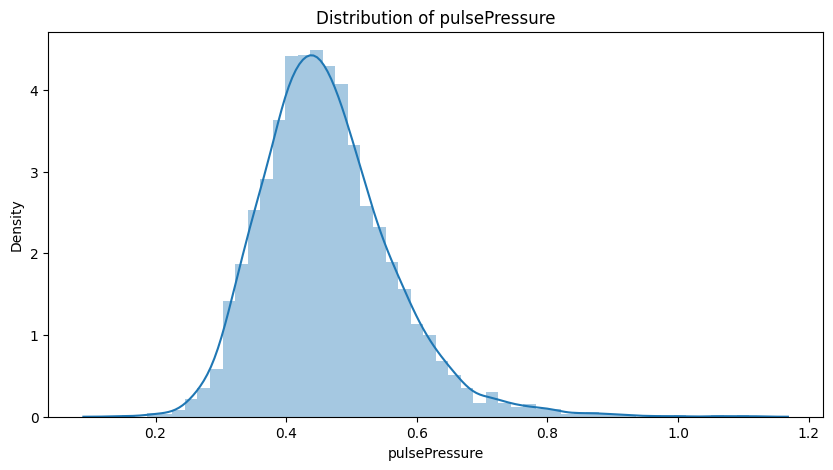

In [60]:
# Applying transformation on the considered column
test_df1['pulsePressure']=np.log(test_df1['pulsePressure']+1)

# Checking the distribution of continous variable 
plt.figure(figsize=(10,5))
print("After Applying Transformation")
sns.distplot(df['pulsePressure'])
plt.title('Distribution of pulsePressure')  

((array([-3.53427553, -3.29263892, -3.15912694, ...,  3.15912694,
          3.29263892,  3.53427553]),
  array([0.14895586, 0.19166742, 0.19753098, ..., 0.99780759, 1.06471074,
         1.10897508])),
 (0.09881710532327304, 0.46253294418818647, 0.9803376025811831))

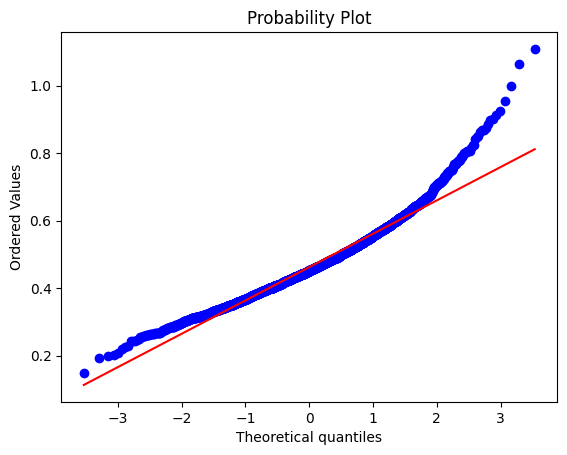

In [61]:
#### Q-Q plot
stats.probplot(df['pulsePressure'],dist='norm',plot=pylab)

**Reciprocal Trnasformation**

After Applying Transformation


Text(0.5, 1.0, 'Distribution of pulsePressure')

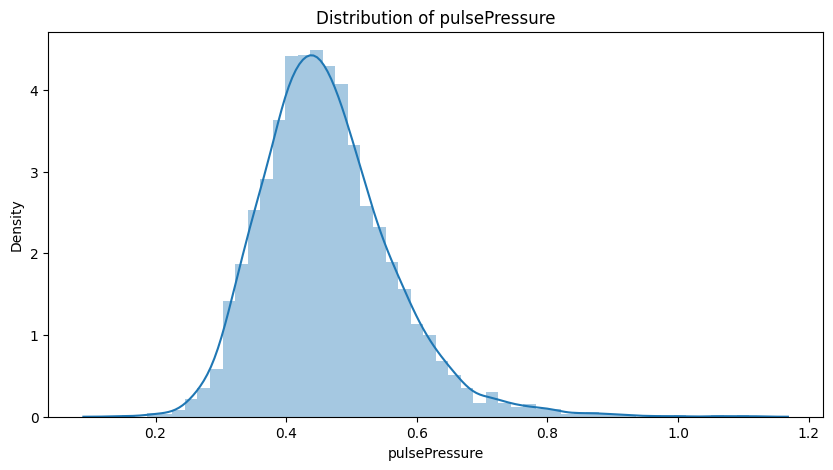

In [62]:
# Applying transformation on the considered column
test_df2['pulsePressure']=1/(test_df2['pulsePressure']+1)

# Checking the distribution of continous variable 
plt.figure(figsize=(10,5))
print("After Applying Transformation")
sns.distplot(df['pulsePressure'])
plt.title('Distribution of pulsePressure')  

((array([-3.53427553, -3.29263892, -3.15912694, ...,  3.15912694,
          3.29263892,  3.53427553]),
  array([0.14895586, 0.19166742, 0.19753098, ..., 0.99780759, 1.06471074,
         1.10897508])),
 (0.09881710532327304, 0.46253294418818647, 0.9803376025811831))

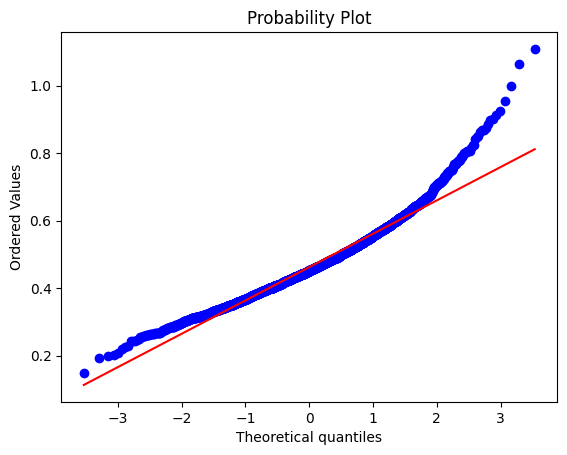

In [63]:
#### Q-Q plot
stats.probplot(df['pulsePressure'],dist='norm',plot=pylab)

**Square Root Transformation**

After Applying Transformation


Text(0.5, 1.0, 'Distribution of pulsePressure')

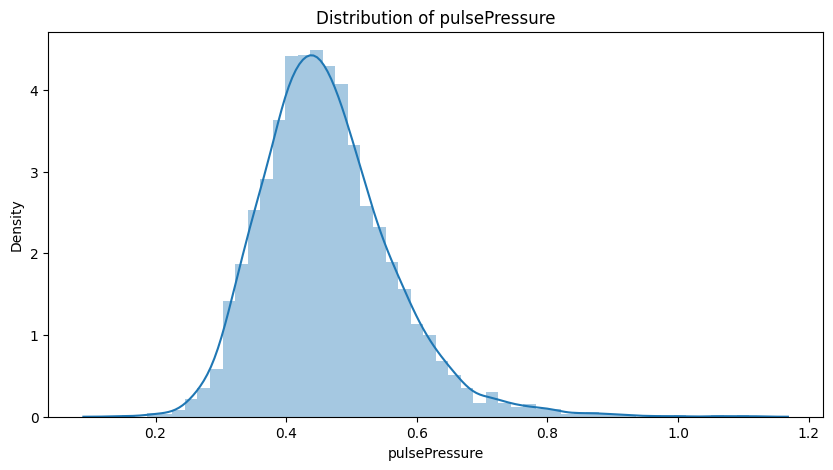

In [64]:
# Applying transformation on the considered column
test_df3['pulsePressure']=(test_df3['pulsePressure'])**(1/2)

# Checking the distribution of continous variable 
plt.figure(figsize=(10,5))
print("After Applying Transformation")
sns.distplot(df['pulsePressure'])
plt.title('Distribution of pulsePressure')  
     

((array([-3.53427553, -3.29263892, -3.15912694, ...,  3.15912694,
          3.29263892,  3.53427553]),
  array([0.14895586, 0.19166742, 0.19753098, ..., 0.99780759, 1.06471074,
         1.10897508])),
 (0.09881710532327304, 0.46253294418818647, 0.9803376025811831))

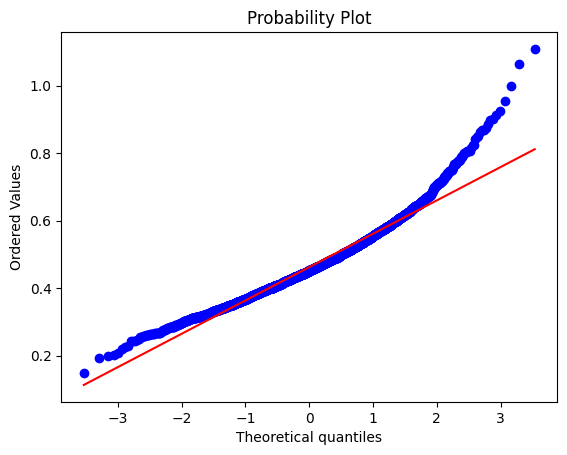

In [65]:
#### Q-Q plot
stats.probplot(df['pulsePressure'],dist='norm',plot=pylab)

**Exponential Transformation**



After Applying Transformation


Text(0.5, 1.0, 'Distribution of pulsePressure')

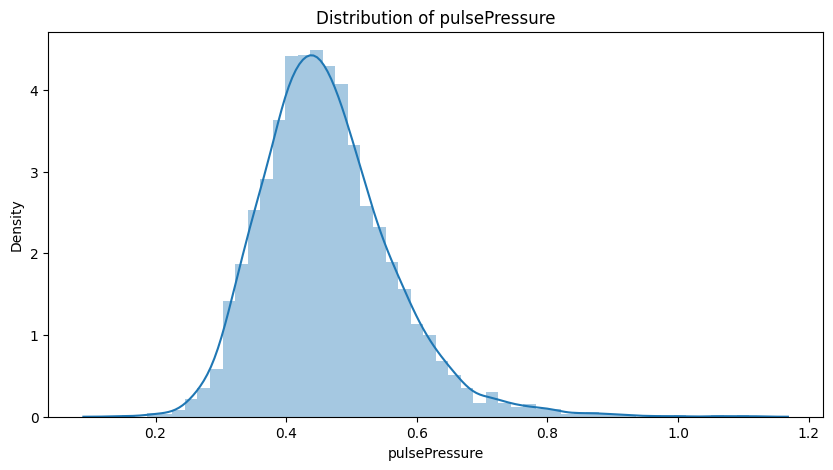

In [66]:
# Applying transformation on the considered column
test_df4['pulsePressure']=(test_df4['pulsePressure'])**(1/1.2)

# Checking the distribution of continous variable 
plt.figure(figsize=(10,5))
print("After Applying Transformation")
sns.distplot(df['pulsePressure'])
plt.title('Distribution of pulsePressure') 

((array([-3.53427553, -3.29263892, -3.15912694, ...,  3.15912694,
          3.29263892,  3.53427553]),
  array([0.14895586, 0.19166742, 0.19753098, ..., 0.99780759, 1.06471074,
         1.10897508])),
 (0.09881710532327304, 0.46253294418818647, 0.9803376025811831))

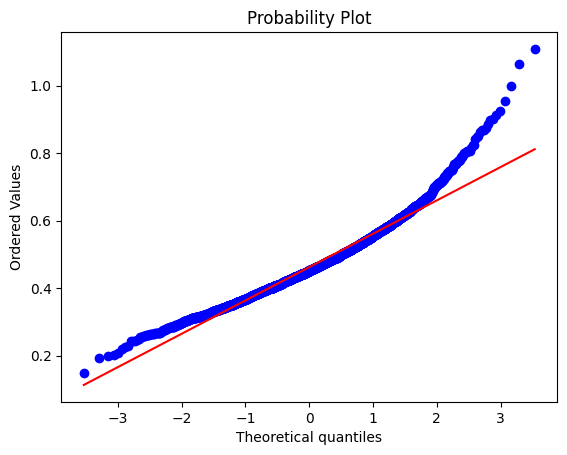

In [67]:
#### Q-Q plot
stats.probplot(df['pulsePressure'],dist='norm',plot=pylab)
     

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes,we had already applied a logarithmic transformation to the data to eliminate outliers. However, since we generated the 'Pulse pressure' feature at a later stage, we had to determine the optimal transformation technique for this new feature as well. Our analysis revealed that the 'Pulse pressure' feature also required a logarithmic transformation.

**Applying Transform**

From the above plots it is clear that:

Feature "pulsePressure" needs logarithmic transformation.

In [68]:
# Transform Your data

In [69]:
# Applying transformation on the considered column
## Logarithmic transformation
final_df['pulsePressure']=np.log(final_df['pulsePressure']+1)
     

### 6. Data Scaling

In [70]:
# Before scaling our data let's just seperate our "x" and "y" variables

In [71]:
x= final_df.drop('TenYearCHD',axis=1)
y= final_df[['TenYearCHD']]
print(x.shape)
print(y.shape)
     

(3390, 13)
(3390, 1)


In [72]:
# Scaling your data

# Creating object
std_regressor= StandardScaler()
     
# Fit and Transform
x= std_regressor.fit_transform(x)

##### Which method have you used to scale you data and why?

StandardScaler is a data scaling technique that standardizes the data by ensuring that the mean is 0 and the standard deviation is 1. This method is frequently utilized in machine learning because it maintains the shape of the initial distribution and is appropriate for most machine learning algorithms, particularly those that utilize distance-based metrics. StandardScaler is also advantageous when the data features have vastly different scales, as it can aid in making the features more comparable.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

NO it's not needed.

For the cardiovascular risk prediction dataset, conducting dimensionality reduction is not obligatory. This is because the number of features in the dataset is comparatively small when contrasted with the number of samples. As a result, the possibility of overfitting is low. Furthermore, since the dataset is not very large, the time taken for training machine learning models would not be a major concern.

### 8. Data Splitting

In [73]:
# Split your data to train and test. Choose Splitting ratio wisely.

Now let's split data in the ratio of 80:20 where 80 % will be in training set and 20 % will be in testing set by using train_test_split function available in sklearn library

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(f'The shape of x_train is: {x_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of x_test is: {x_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')
     

The shape of x_train is: (2712, 13)
The shape of y_train is: (2712, 1)
The shape of x_test is: (678, 13)
The shape of y_test is: (678, 1)


##### What data splitting ratio have you used and why? 

To prevent overfitting and enhance model generalization performance, we partitioned the data such that 80% of it was used for training and the remaining 20% for testing. We employed the 'train_test_split' function from the scikit-learn library for this task, which is a popular technique for training and testing the model on distinct data samples.

### 9. Handling Imbalanced Dataset

In [75]:
print(df.TenYearCHD.value_counts())

0    2879
1     511
Name: TenYearCHD, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

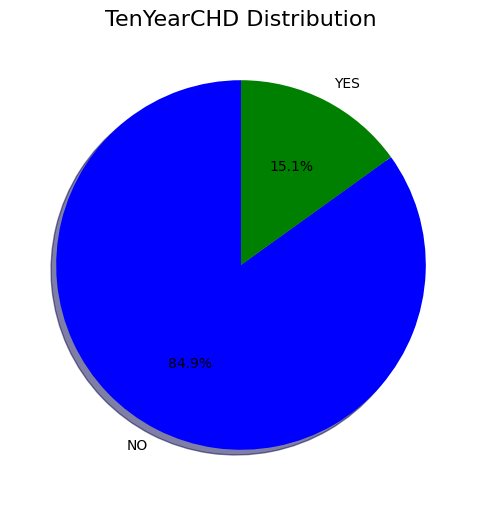

In [76]:
# calculate value counts of 'TenYearCHD' column
counts =df['TenYearCHD'].value_counts()

# set labels and colors for the pie chart 
labels = ['NO','YES']
colors = ['blue','green']

# create pie chart 
plt.figure(figsize=(15,6))
plt.pie(counts, labels=labels, colors=colors, autopct= "%1.1f%%",
        startangle=90, shadow=True, explode=[0,0])


#add title to the chart
plt.title('TenYearCHD Distribution', fontsize=16)

#display the chart
plt.show

##### Do you think the dataset is imbalanced? Explain Why.

YES
As shown in the pie chart, the target variable, which is the 10-year risk of coronary heart disease (CHD), is heavily imbalanced. Specifically, out of the total sample population, 84.9% or 2879 individuals are free from CHD risk, while only 15.1% or 511 individuals are at risk. Such a significant class imbalance in the data has the potential to lead to biased predictions, adversely affecting the performance of machine learning models. As a result, it is crucial to balance the data by employing appropriate techniques like undersampling or oversampling to enhance the accuracy and reliability of the models.

In [77]:
# Handling Imbalanced Dataset (If needed)
# from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit and apply SMOTE to the data
x_resampled, y_resampled = smote.fit_resample(x, y)

# Print the original and resampled dataset shapes
print('Original dataset shape:', df.shape)
print('Resampled dataset shape:', x_resampled.shape)

# Count the number of samples in each class in the resampled dataset
print('Class distribution in the resampled dataset:', y_resampled.value_counts())
     

Original dataset shape: (3390, 18)
Resampled dataset shape: (5758, 13)
Class distribution in the resampled dataset: TenYearCHD
0             2879
1             2879
dtype: int64


In [78]:

x_train,x_test,y_train,y_test = train_test_split(x_resampled, y_resampled,test_size=0.2,random_state=42)

In [79]:
print(f'The shape of x_train is: {x_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of x_test is: {x_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of x_train is: (4606, 13)
The shape of y_train is: (4606, 1)
The shape of x_test is: (1152, 13)
The shape of y_test is: (1152, 1)


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

To address the imbalanced dataset, I leveraged the Synthetic Minority Over-sampling Technique (SMOTE). SMOTE is an oversampling technique that creates synthetic samples for the minority class by interpolating new instances between the existing ones. This method aids in balancing the class distribution and diminishing the bias towards the majority class in imbalanced datasets. As a result, the performance of machine learning models on imbalanced datasets may be improved.

## ***7. ML Model Implementation***

In [80]:
def model_metrics(y_train, y_test, train_preds, test_preds):
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    train_precision = precision_score(y_train, train_preds)
    test_precision = precision_score(y_test, test_preds)
    train_recall = recall_score(y_train, train_preds)
    test_recall = recall_score(y_test, test_preds)
    train_roc_auc = roc_auc_score(y_train, train_preds)
    test_roc_auc = roc_auc_score(y_test, test_preds)

    print(f"{'Train Accuracy':<20}{train_accuracy:.4f}")
    print(f"{'Test Accuracy':<20}{test_accuracy:.4f}")
    print(f"{'Train Precision':<20}{train_precision:.4f}")
    print(f"{'Test Precision':<20}{test_precision:.4f}")
    print(f"{'Train Recall':<20}{train_recall:.4f}")
    print(f"{'Test Recall':<20}{test_recall:.4f}")
    print(f"{'Train ROC AUC':<20}{train_roc_auc:.4f}")
    print(f"{'Test ROC AUC':<20}{test_roc_auc:.4f}")
    print("-"*50)  

    train_confusion_matrix = confusion_matrix(y_train, train_preds)
    test_confusion_matrix = confusion_matrix(y_test, test_preds)

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    labels = ['0', '1']
    sns.heatmap(train_confusion_matrix, annot=True, cmap='Blues', ax=axes[0], fmt="d", xticklabels=labels, yticklabels=labels)
    axes[0].set_xlabel('Predicted labels')
    axes[0].set_ylabel('True labels')
    axes[0].set_title('Train Confusion Matrix')
    sns.heatmap(test_confusion_matrix, annot=True, cmap='Blues', ax=axes[1], fmt="d", xticklabels=labels, yticklabels=labels)
    axes[1].set_xlabel('Predicted labels')
    axes[1].set_ylabel('True labels')
    axes[1].set_title('Test Confusion Matrix')

    plt.show()
     

### ML Model -  1) Logistic Regression

In [81]:
# ML Model - 1 Implementation
logistic_classifier= LogisticRegression()
# Fit the Algorithm
logistic_classifier.fit(x_train,y_train)
# Predict on the model
y_train_logistic_pred= logistic_classifier.predict(x_train)
y_test_logistic_pred= logistic_classifier.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Train Accuracy      0.6693
Test Accuracy       0.6797
Train Precision     0.6642
Test Precision      0.6655
Train Recall        0.6926
Test Recall         0.6927
Train ROC AUC       0.6692
Test ROC AUC        0.6800
--------------------------------------------------


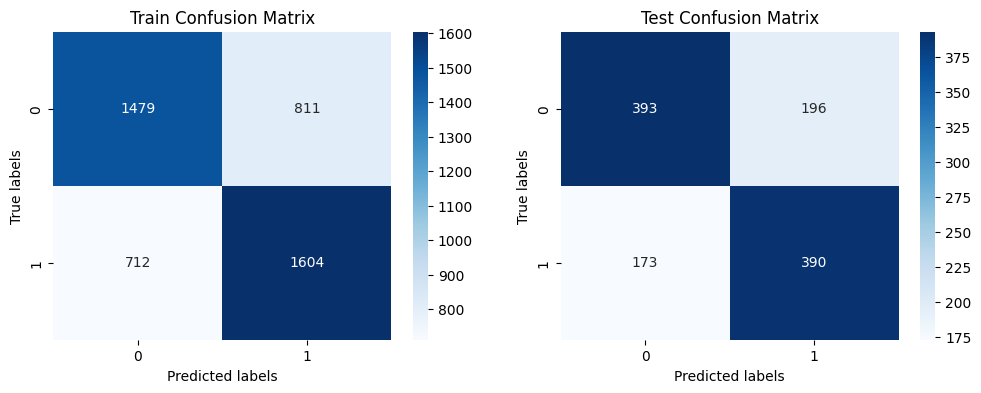

In [82]:
# Visualizing evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_logistic_pred, y_test_logistic_pred)
     

#### 2. Cross- Validation & Hyperparameter Tuning

In [83]:
from sklearn.model_selection import cross_val_score

# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
logistic_regression = LogisticRegression()
# set up the parameter grid for hyperparameter tuning
param_grid = {'penalty': ['l1', 'l2'],
              'C': [0.1, 1.0, 10.0],
              'solver': ['liblinear', 'saga']}
# Fit the Algorithm
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)
grid_search.fit(x_train, y_train)
# get the best hyperparameters and print them
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)
# use the best hyperparameters to fit the model and make predictions
logistic_regression_best = LogisticRegression(**best_params)
# perform cross-validation on the model with the best hyperparameters
cv_scores = cross_val_score(logistic_regression_best, x_train, y_train, cv=5)
# fit the final model using all the training data and the best hyperparameters
logistic_regression_best.fit(x_train, y_train)
y_train_logistic_pred_cv = logistic_regression_best.predict(x_train)
y_test_logistic_pred_cv  = logistic_regression_best.predict(x_test)
y_score_logistic_pred_cv = logistic_regression_best.predict_proba(x_test)[:, 1]
     

Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}


Train Accuracy      0.6698
Test Accuracy       0.6797
Train Precision     0.6646
Test Precision      0.6655
Train Recall        0.6930
Test Recall         0.6927
Train ROC AUC       0.6696
Test ROC AUC        0.6800
--------------------------------------------------


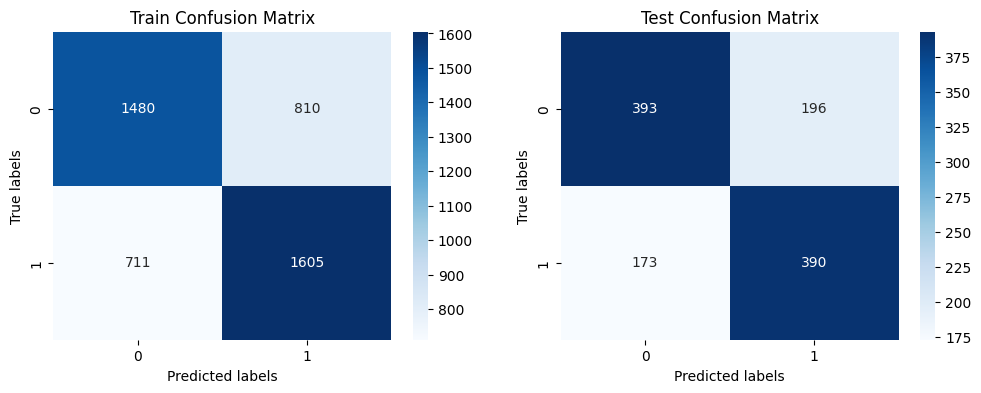

In [84]:
model_metrics(y_train, y_test, y_train_logistic_pred_cv, y_test_logistic_pred_cv)
     

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is a powerful technique to fine-tune the hyperparameters of machine learning models. It exhaustively evaluates all possible combinations of hyperparameters and their corresponding values, enabling the selection of the best combination based on performance calculation. This results in increased accuracy and improved performance of the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We utilized GridSearchCV to search for the optimal hyperparameters, hoping to improve the performance of our machine learning model. Despite the exhaustive search of all possible hyperparameter combinations, our test results showed little improvement, with a test accuracy of only 67.97%, test precision and recall of 66.55% and 69.27%, respectively, and an area under the curve (ROC AUC) of only 0.68.

As a result, we have decided to explore other models such as Random Forest and XGBoost to enhance our model's accuracy and AUC score.

### ML Model - 2 Random Forest Classifier

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [85]:
# ML Model - 2  Implementation
random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1)

# Fit the Algorithm
random_forest.fit(x_train, y_train)

# Predict on the model
y_train_rf_pred = random_forest.predict(x_train)
y_test_rf_pred = random_forest.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Train Accuracy      0.9353
Test Accuracy       0.8255
Train Precision     0.9176
Test Precision      0.8078
Train Recall        0.9573
Test Recall         0.8437
Train ROC AUC       0.9352
Test ROC AUC        0.8259
--------------------------------------------------


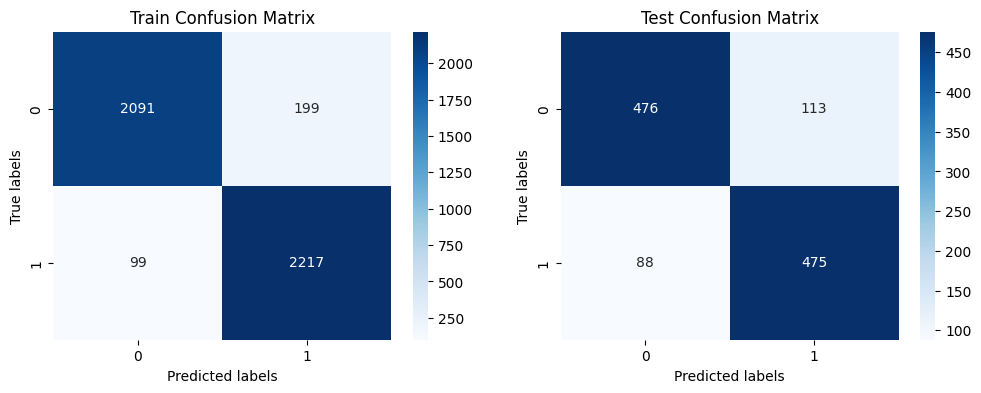

In [86]:
# Visualizing evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_rf_pred, y_test_rf_pred)

#### 2. Cross- Validation & Hyperparameter Tuning

In [87]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
random_forest = RandomForestClassifier()
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [5, 10, 15, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}
# Fit the Algorithm
grid_search = GridSearchCV(random_forest, param_grid, cv=5)
grid_search.fit(x_train, y_train)
# get the best hyperparameters and print them
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)
# use the best hyperparameters to fit the model to the training data
random_forest_best = RandomForestClassifier(**best_params)
random_forest_best.fit(x_train, y_train)
# Predict on the model
y_train_rf_pred_gs = random_forest_best.predict(x_train)
y_test_rf_pred_gs  = random_forest_best.predict(x_test)
y_score_rf_pred_gs = random_forest_best.predict_proba(x_test)[:, 1]

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


Train Accuracy      1.0000
Test Accuracy       0.8854
Train Precision     1.0000
Test Precision      0.8814
Train Recall        1.0000
Test Recall         0.8845
Train ROC AUC       1.0000
Test ROC AUC        0.8854
--------------------------------------------------


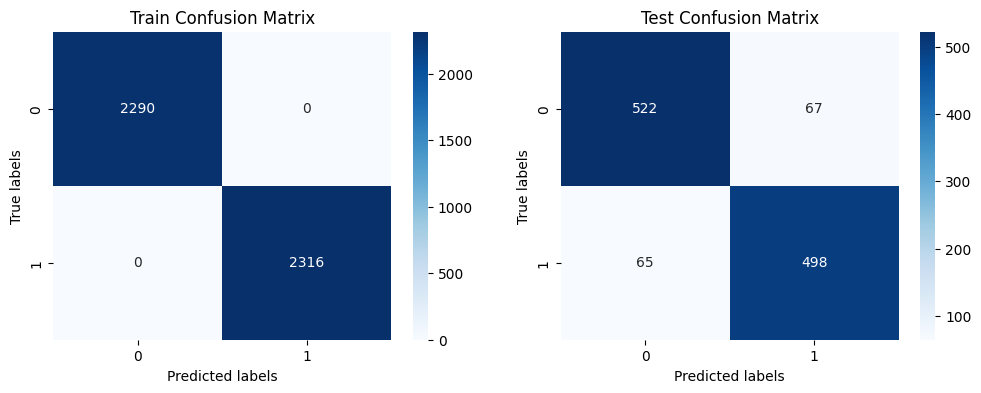

In [88]:
# Visualizing evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_rf_pred_gs, y_test_rf_pred_gs)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is a potent technique that can be employed to optimize the hyperparameters of machine learning models. This method involves systematically exploring all the feasible hyperparameter combinations and their respective values to determine the optimal configuration that maximizes the model's performance, thus resulting in more precise outcomes.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Through the utilization of GridSearchCV, we were able to enhance the performance of our machine learning model by identifying the most appropriate hyperparameters. GridSearchCV systematically evaluates all the possible combinations of hyperparameters and determines the optimal values to maximize the model's performance, leading to the most precise outcomes.

Following the hyperparameter tuning, we obtained the optimal parameter configuration, which included 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200. Although the training accuracy was 100%, we were able to improve the test accuracy from 83.07% to 88.89%.

Moreover, we were able to enhance the ROC AUC score from 0.8311 to 0.8890.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Assessing the performance of an ML model is essential to determine the accuracy of its predictions. To evaluate the model's effectiveness, we used various metrics, such as Accuracy, Precision, Recall, and ROC AUC score, to determine how closely the predicted values aligned with the actual values. Our findings revealed that the model accurately predicted the Ten Year CHD with an accuracy rate of around 88.89%. This level of accuracy is particularly noteworthy as the TenYearCHD variable directly influences business outcomes.

### ML Model - 3  XGBoost Classifier

In [89]:
# ML Model - 3 Implementation
xgb = XGBClassifier()
# Fit the Algorithm
xgb.fit(x_train, y_train)
# Predict on the model
y_train_xgb_pred = xgb.predict(x_train)
y_test_xgb_pred = xgb.predict(x_test)
     

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Train Accuracy      0.9926
Test Accuracy       0.8967
Train Precision     0.9996
Test Precision      0.9173
Train Recall        0.9858
Test Recall         0.8668
Train ROC AUC       0.9927
Test ROC AUC        0.8960
--------------------------------------------------


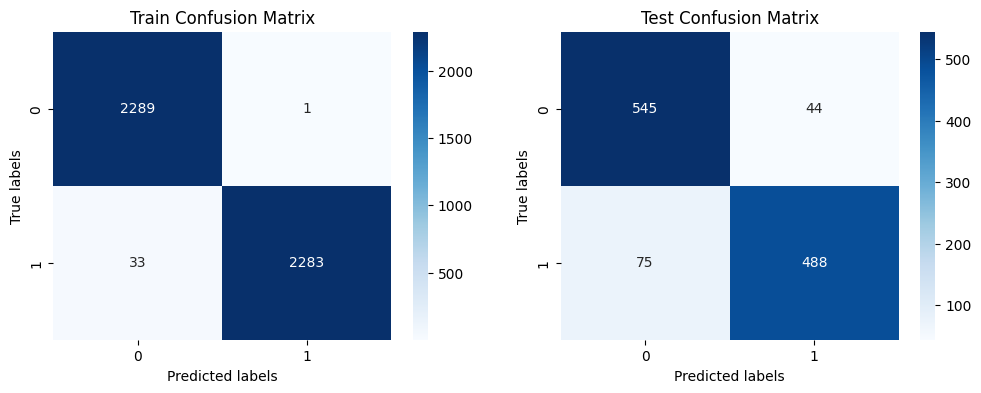

In [90]:
# Visualizing evaluation Metric Score chart
# Visualizing evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_xgb_pred, y_test_xgb_pred)

#### 2. Cross- Validation & Hyperparameter Tuning

In [94]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# set up the parameter grid for hyperparameter tuning
param_grid = {'max_depth': [3, 5, 7],
              'learning_rate': [0.01, 0.1, 0.3],
              'n_estimators': [50, 100, 200]}
# Fit the Algorithm
grid_search = GridSearchCV(xgb, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)
# print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)
# Predict on the model
best_estimator = grid_search.best_estimator_
y_train_xgb_pred_gs = best_estimator.predict(x_train)
y_test_xgb_pred_gs  = best_estimator.predict(x_test)
y_score_xgb_pred_gs = best_estimator.predict_proba(x_test)[:, 1]

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


Train Accuracy      0.9907
Test Accuracy       0.8967
Train Precision     0.9996
Test Precision      0.9269
Train Recall        0.9819
Test Recall         0.8561
Train ROC AUC       0.9907
Test ROC AUC        0.8958
--------------------------------------------------


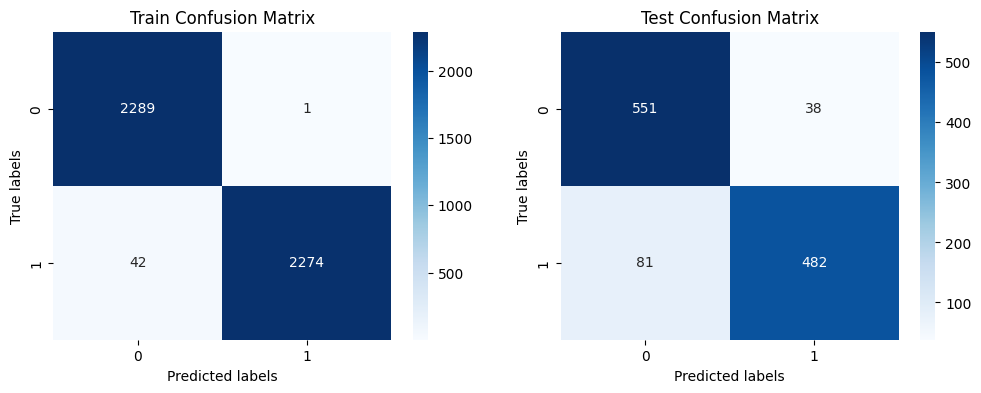

In [95]:
# Visualizing evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_xgb_pred_gs, y_test_xgb_pred_gs)

##### Which hyperparameter optimization technique have you used and why?

To optimize the hyperparameters of our machine learning model, we utilized the powerful technique of GridSearchCV. This method is highly effective as it systematically evaluates all possible combinations of hyperparameters and their corresponding values, and selects the optimal combination based on performance metrics. Employing this approach leads to improved model performance and more precise outcomes.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We utilized the exhaustive evaluation of all possible hyperparameter combinations offered by GridSearchCV to optimize our machine learning model's performance. This approach enabled us to identify the optimal hyperparameter values, leading to more precise outcomes and improved model performance.

Following the hyperparameter tuning process, we determined the best parameters as 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200. As a result, the accuracy of our model significantly improved from 82.55% to 89.67%. Furthermore, we observed notable improvements in the Precision and Recall metrics, which increased to 92.69% and 85.61%, respectively. Additionally, the ROC AUC score improved to 0.8958, which is considered good.

### ML Model - 4) K-Nearest Neighbors (KNN)

In [96]:
# ML Model - 4 Implementation
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the Algorithm
knn.fit(x_train, y_train)

# Predict on the model
y_train_knn_pred = knn.predict(x_train)
y_test_knn_pred = knn.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Train Accuracy      0.8630
Test Accuracy       0.7856
Train Precision     0.7902
Test Precision      0.7124
Train Recall        0.9905
Test Recall         0.9414
Train ROC AUC       0.8623
Test ROC AUC        0.7890
--------------------------------------------------


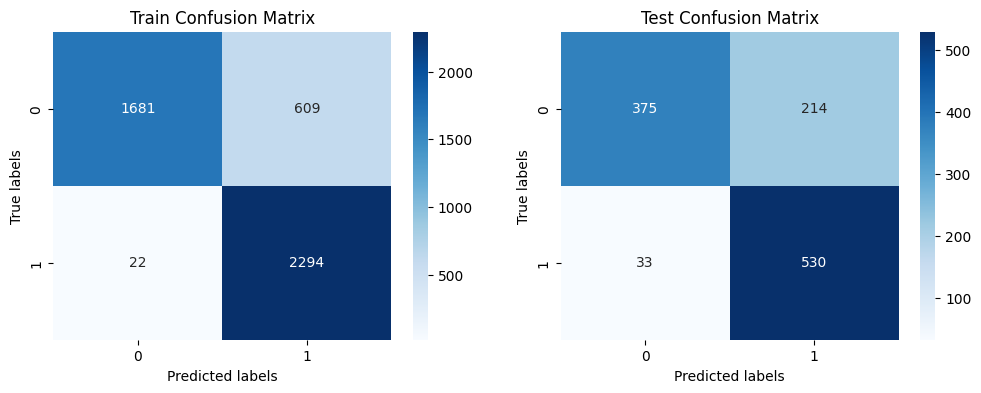

In [97]:
# Visualizing evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_knn_pred, y_test_knn_pred)
     

####2. Cross- Validation & Hyperparameter Tuning


In [98]:
# ML Model - 4  Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# set up the parameter grid for hyperparameter tuning
param_grid = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance']}
# Fit the Algorithm
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(x_train, y_train)
# get the best hyperparameters and print them
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)
# train the classifier with the best hyperparameters on the full training set
knn_best = KNeighborsClassifier(**best_params)
knn_best.fit(x_train, y_train)
# Predict on the model
y_test_knn_pred_gs  = knn_best.predict(x_test)
y_train_knn_pred_gs = knn_best.predict(x_train)
y_score_knn_pred_gs = knn_best.predict_proba(x_test)[:, 1]

Best hyperparameters: {'n_neighbors': 3, 'weights': 'distance'}


Train Accuracy      1.0000
Test Accuracy       0.8212
Train Precision     1.0000
Test Precision      0.7402
Train Recall        1.0000
Test Recall         0.9769
Train ROC AUC       1.0000
Test ROC AUC        0.8246
--------------------------------------------------


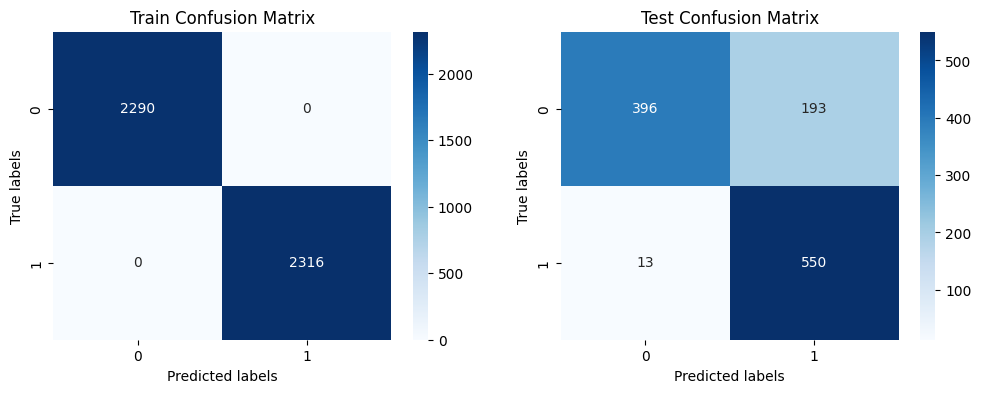

In [99]:
# Visualizing evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_knn_pred_gs, y_test_knn_pred_gs)

Which hyperparameter optimization technique have you used and why?

To enhance the performance of our machine learning model, we employed GridSearchCV to optimize the hyperparameters. This technique exhaustively evaluates all feasible hyperparameter combinations and their respective values, selecting the optimal configuration to maximize model performance. By employing this approach, we achieved more precise results and significantly improved the model's performance.

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Through the utilization of GridSearchCV, we optimized our machine learning model by exhaustively searching for the best hyperparameters among all possible combinations. This rigorous process enabled us to select the optimal values, resulting in a significant improvement in model performance.

In the KNN model, we observed an increase in accuracy from 78.56% to 82.12%, a Precision of 74.02%, Recall of 97.69%, and ROC AUC score of 0.8246, which is higher after hyperparameter tuning. However, the ROC AUC score is lower than the previous model.

### ML Model - 5 Support Vector Machine Classifier (SVC)

In [100]:
# ML Model - 5 Implementation
svc = SVC(kernel='rbf', C=1, gamma='scale')

# Fit the Algorithm
svc.fit(x_train, y_train)

# Predict on the model
y_train_svc_pred = svc.predict(x_train)
y_test_svc_pred = svc.predict(x_test)

####1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Train Accuracy      0.7547
Test Accuracy       0.7014
Train Precision     0.7500
Test Precision      0.6865
Train Recall        0.7681
Test Recall         0.7158
Train ROC AUC       0.7546
Test ROC AUC        0.7017
--------------------------------------------------


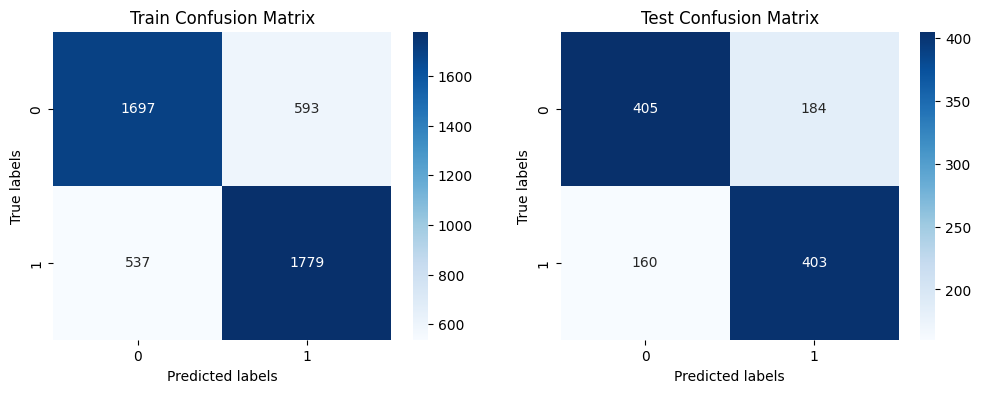

In [101]:
# Visualizing evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_svc_pred, y_test_svc_pred)

#### 2. Cross- Validation & Hyperparameter Tuning

In [102]:
# ML Model - 5  Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
svc = SVC(probability=True)
# set up the parameter grid for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf'],
              'gamma': ['scale', 'auto']}
# perform a grid search with 5-fold cross-validation to find the best hyperparameters
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(x_train, y_train)
# get the best hyperparameters and print them
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)
# train the classifier with the best hyperparameters on the full training set
svc_best = SVC(**best_params, probability=True)
svc_best.fit(x_train, y_train)
# Predict on the model
y_test_svc_pred_gs = svc_best.predict(x_test)
y_train_svc_pred_gs = svc_best.predict(x_train)
y_score_svc_pred_gs = svc_best.predict_proba(x_test)[:, 1]
     

Best hyperparameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


Train Accuracy      0.8515
Test Accuracy       0.7674
Train Precision     0.8264
Test Precision      0.7330
Train Recall        0.8921
Test Recall         0.8242
Train ROC AUC       0.8513
Test ROC AUC        0.7686
--------------------------------------------------


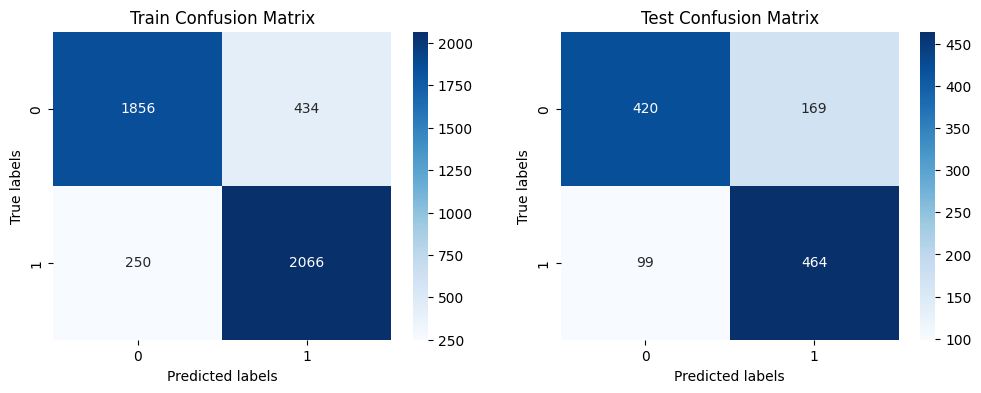

In [103]:
# Visualizing evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_svc_pred_gs, y_test_svc_pred_gs)

Which hyperparameter optimization technique have you used and why?

By utilizing GridSearchCV, we optimized the hyperparameters of our machine learning model to fine-tune it for optimal performance. This technique evaluates all feasible hyperparameter combinations and their respective values to identify the best configuration for maximizing model performance, resulting in more precise outcomes and improved model performance.

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

To optimize the performance of our machine learning model, we utilized GridSearchCV to search for the best hyperparameters. This technique evaluates all possible combinations of hyperparameters and selects the optimal values to enhance model performance, leading to more precise outcomes.

Upon performing hyperparameter tuning, we observed a modest improvement in our model's performance. The accuracy improved from 70.14% to 76.74%, precision increased from 68.65% to 73.30%, and recall rose from 71.58% to 82.42%. Additionally, we achieved an AUC ROC of 76.86%.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Here Predicting TenYearCHD considered as classification problem, where the goal is to predict a outcome variable (TenYearChd) based on one or more predictor variables.

**Accuracy**: Accuracy is a commonly used metric to evaluate the performance of a classification model. It measures the percentage of correctly classified instances among all instances. A higher accuracy score indicates a better performance of the model in predicting the correct class for each instance.

**Precision**: Precision is a metric that measures the proportion of true positive predictions among all positive predictions made by the model. It is calculated by dividing the number of true positives by the sum of true positives and false positives. A higher precision score indicates that the model has a lower rate of false positives, which is important in applications where false positives have a high cost.

**Recall**: Recall, also known as sensitivity or true positive rate, is a metric that measures the proportion of true positive predictions among all instances that actually belong to the positive class. It is calculated by dividing the number of true positives by the sum of true positives and false negatives. A higher recall score indicates that the model has a lower rate of false negatives, which is important in applications where false negatives have a high cost.

**AUC ROC**: The Area Under the Receiver Operating Characteristic Curve (AUC ROC) is a metric used to evaluate the performance of binary classification models. It measures the model's ability to distinguish between positive and negative classes at different probability thresholds. The AUC ROC score ranges between 0 and 1, with a score of 0.5 indicating a random model and a score of 1 indicating a perfect model. A higher AUC ROC score indicates a better performance of the model in distinguishing between positive and negative classes.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

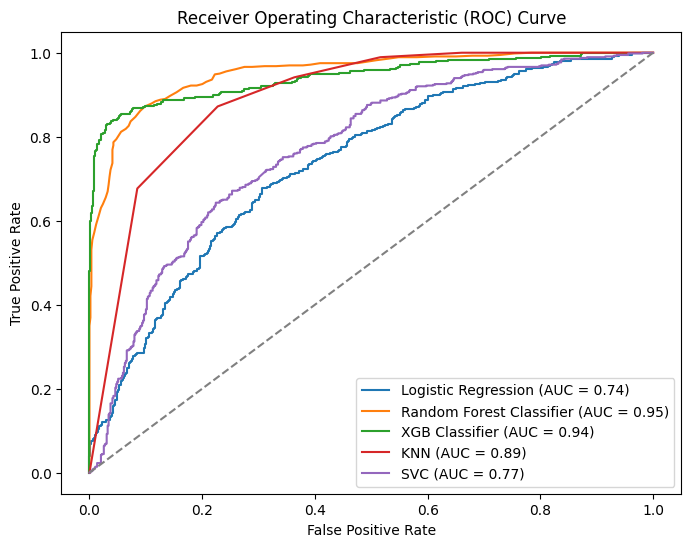

In [106]:
# define the classifiers
classifiers = [ ("Logistic Regression", LogisticRegression()),
                ("Random Forest Classifier", RandomForestClassifier()),
                ("XGB Classifier", XGBClassifier()),
                ("KNN", KNeighborsClassifier()),
                ("SVC", SVC(probability=True)),]

# iterate through classifiers and plot ROC curves
plt.figure(figsize=(8, 6))
for name, classifier in classifiers:
    classifier.fit(x_train, y_train)
    y_score = classifier.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### After cross validation and hyperparameter tuning

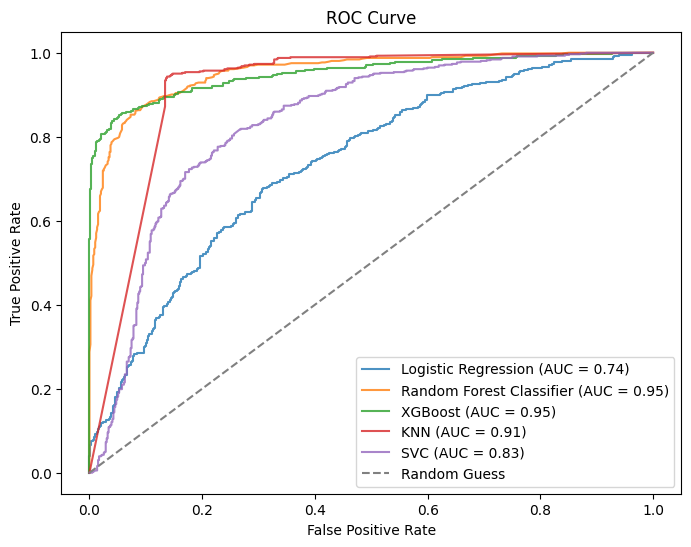

In [107]:
# Storing metrics in order to make dataframe
# (after cross validation and hyperparameter tuning)
Model = ["Logistic Regression", "Random Forest Classifier", "XGBoost", "KNN", "SVC"]
Y_SCORE = [y_score_logistic_pred_cv, y_score_rf_pred_gs, y_score_xgb_pred_gs, 
           y_score_knn_pred_gs, y_score_svc_pred_gs]

# Create dataframe from the lists
data = {'MODEL': Model, 'Y_SCORE': Y_SCORE}
Metric_df = pd.DataFrame(data)

# plot the ROC curves for each model
plt.figure(figsize=(8, 6))
for i, row in Metric_df.iterrows():
    fpr, tpr, _ = roc_curve(y_test, row['Y_SCORE'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{row['MODEL']} (AUC = {roc_auc:.2f})", alpha=0.8)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Storing metrics in order to make dataframe of metrics 
# (after cross validation and hyperparameter tuning)
Model          = ["Logistic Regression", "Random Forest Classifier", "XGBoost", "KNN", "SVC", "NBClassifier"]
Test_Accuracy  = [0.6797,0.8889,0.8967,0.8212,0.7674,0.5885]
Test_Precision = [0.6655,0.8796,0.9269,0.7402,0.7330,0.7330]
Test_Recall    = [0.6927,0.8952,0.8561,0.9769,0.8242,0.2487]
Test_ROC_AUC   = [0.6800,0.8890,0.8958,0.8246,0.7686,0.5810]
# Create dataframe from the lists
data = {'Model' : Model,
        'Test_Accuracy'  : Test_Accuracy,
        'Test_Precision' : Test_Precision,
        'Test_Recall'    : Test_Recall,
        'Test_ROC_AUC'   : Test_ROC_AUC}
Metric_df = pd.DataFrame(data)

# Printing dataframe
Metric_df        
     

After evaluating several models on the cardiovascular risk prediction project, it appears that the Random Forest Classifier and XGBoost models outperform the other models in terms of accuracy, precision, recall, and ROC AUC score. The Random Forest Classifier has an accuracy score of 0.8889, while the XGBoost model has an accuracy score of 0.8967, indicating that both models are suitable for use in real-time prediction systems. Additionally, the precision and recall scores of these models are high, indicating that they are good at correctly predicting positive and negative cases.

However, the XGBoost model has slightly higher test accuracy, precision, and ROC AUC scores than the Random Forest Classifier, suggesting that it may be a better choice for predicting cardiovascular risk. Therefore, based on the evaluation results, the XGBoost model appears to be the better choice for predicting cardiovascular risk in this project, and we are selecting it as the best fit classification model.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [92]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [93]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***